In [339]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import chi2_contingency
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from typing import Callable, Optional, Dict, List, Tuple
from graphviz import Digraph, Source
from copy import deepcopy
from collections import Counter
from sklearn.neural_network import MLPClassifier

3.1.1: Analiza tipului de atribute si a plajei de valori a acestuia

In [97]:
diabet_test_data = pd.read_csv('Diabet_test.csv')
diabet_train_data = pd.read_csv('Diabet_train.csv')
diabet_full_data = pd.read_csv('Diabet_full.csv')
credit_risk_test_data = pd.read_csv('credit_risk_test.csv')
credit_risk_train_data = pd.read_csv('credit_risk_train.csv')
credit_risk_full_data = pd.read_csv('credit_risk_full.csv')



0       2
1       0
2       0
3       2
4       0
       ..
1995    0
1996    2
1997    0
1998    0
1999    0
Name: Diabetes, Length: 2000, dtype: int64


Numerical values:
Diabetes set

In [8]:

diabet_numeric_attr = ['psychological-rating', 'BodyMassIndex', 'Age', 'CognitionScore', 'Body_Stats', 'Metabolical_Rate']


diabet_full_data[diabet_numeric_attr].describe()

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,9000.000000
mean,4.365100,28.246500,8.0575,3.125300,194.960784,221.592499
std,8.891103,6.462563,3.0363,7.308607,82.438106,60.480951
min,0.000000,14.000000,1.0000,0.000000,105.063984,71.602207
25%,0.000000,24.000000,6.0000,0.000000,156.720671,180.542314
50%,0.000000,27.000000,8.0000,0.000000,174.042100,224.218817
75%,3.000000,31.000000,10.0000,2.000000,197.742249,262.688901
max,30.000000,92.000000,13.0000,30.000000,553.000000,327.936098


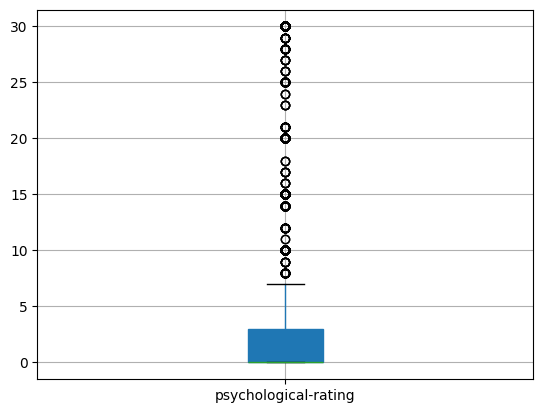

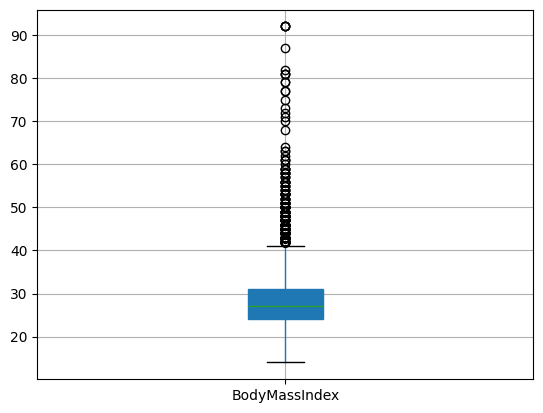

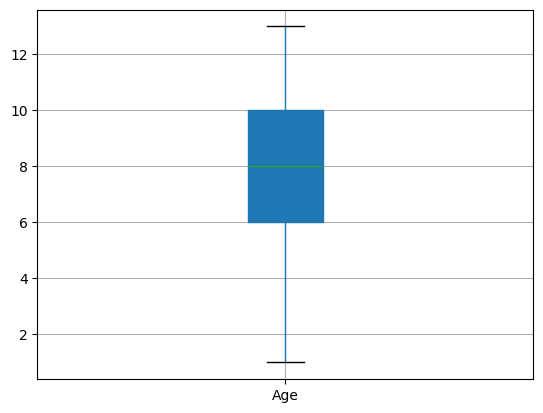

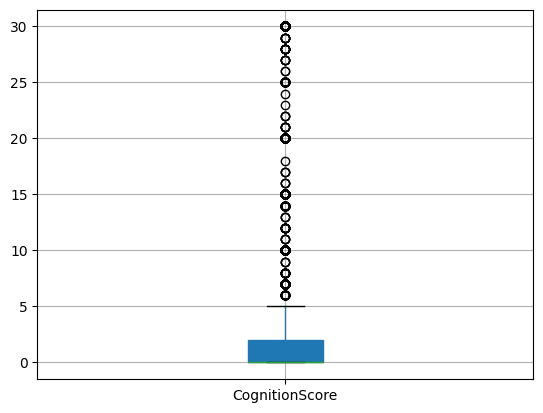

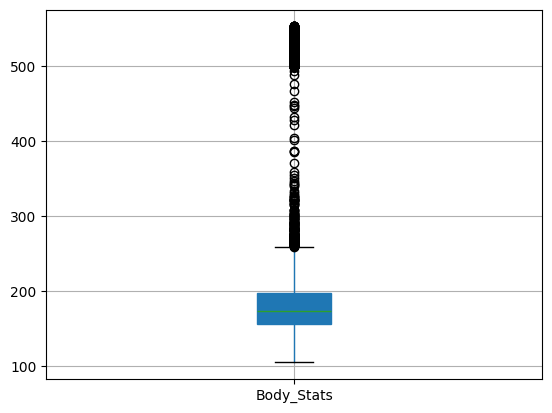

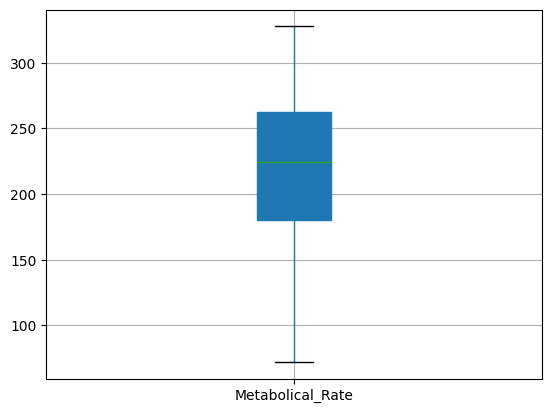

In [9]:

for attr in diabet_numeric_attr:
    diabet_full_data.boxplot(column=attr, patch_artist=True)
    plt.show()

Numerical values:
Credit_risk set

In [10]:
credit_risk_numeric_attr = ['applicant_age', 'applicant_income', 'job_tenure_years', 'loan_amount',
                            'loan_rate', 'loan_income_ratio', 'credit_history_length_years', 'credit_history_length_months']
credit_risk_full_data[credit_risk_numeric_attr].describe()

,applicant_age,applicant_income,job_tenure_years,loan_amount,loan_rate,loan_income_ratio,credit_history_length_years,credit_history_length_months
count,10000.000000,1.000000e+04,9736.000000,10000.000000,9060.000000,10000.000000,10000.000000,10000.000000
mean,27.745100,6.573421e+04,4.785744,9568.037500,11.007179,0.170130,5.811100,75.760700
std,6.360155,5.694439e+04,4.353122,6350.431581,3.266393,0.106814,4.050217,48.677362
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,25.000000
25%,23.000000,3.859500e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,41.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,57.000000
75%,30.000000,7.899700e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,102.000000
max,123.000000,2.039784e+06,123.000000,35000.000000,23.220000,0.760000,30.000000,369.000000


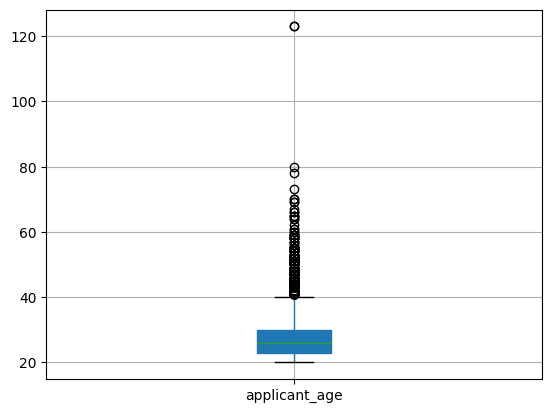

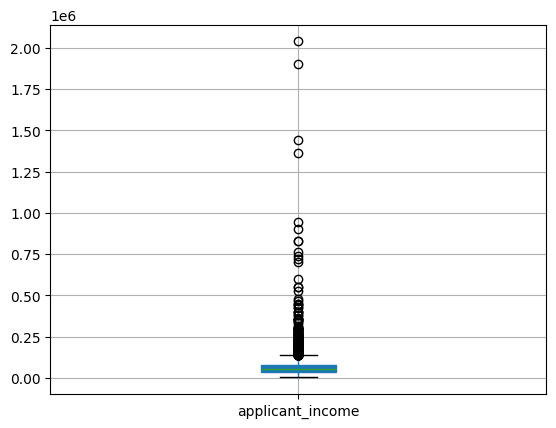

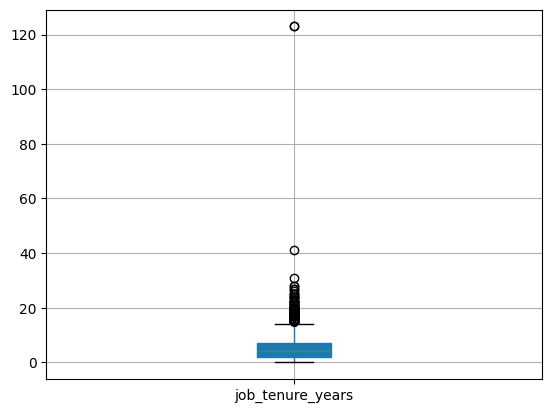

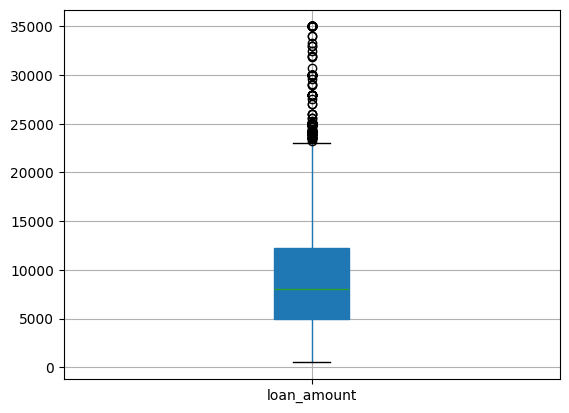

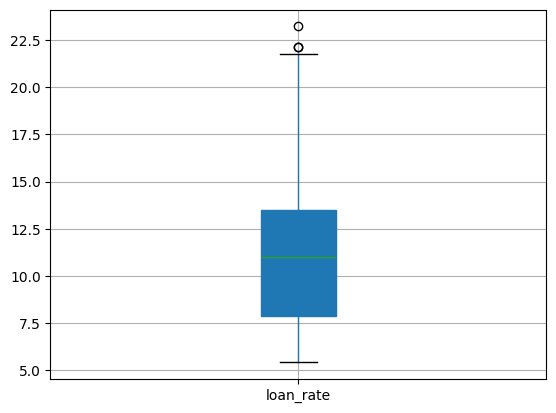

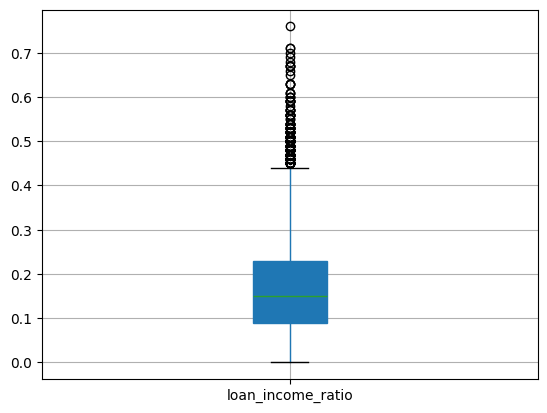

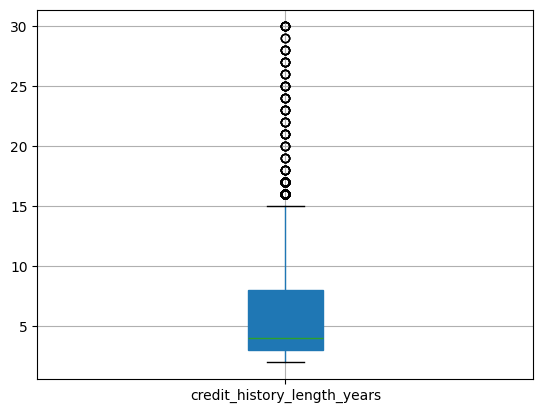

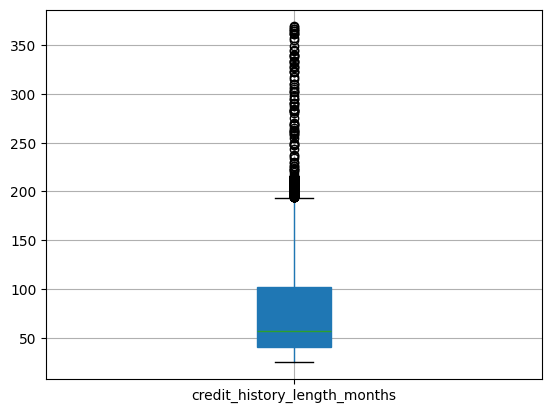

In [11]:

for attr in credit_risk_numeric_attr:
    credit_risk_full_data.boxplot(column=attr, patch_artist=True)
    plt.show()

Atribute discrete set de date Diabet

In [12]:
diabet_ordinal_discrete_attr = ['HealthcareInterest', 'PreCVA', 'RoutineChecks', 'CompletedEduLvl', 'alcoholAbuse', 'cholesterol_ver', 'vegetables', 'HighBP', 'Unprocessed_fructose',
                                'Jogging', 'IncreasedChol', 'gender', 'HealthScore', 'myocardial_infarction', 'SalaryBraket', 'Cardio', 'ImprovedAveragePulmonaryCapacity', 'Smoker']
#add count and number of unique attributes to a table
diabet_ordinal_discrete_attr_count = diabet_full_data[diabet_ordinal_discrete_attr].count()
diabet_ordinal_discrete_attr_unique = diabet_full_data[diabet_ordinal_discrete_attr].nunique()
diabet_ordinal_discrete_attr_table = pd.DataFrame({'count': diabet_ordinal_discrete_attr_count, 'unique': diabet_ordinal_discrete_attr_unique})
diabet_ordinal_discrete_attr_table

,count,unique
HealthcareInterest,10000,2
PreCVA,10000,2
RoutineChecks,10000,2
CompletedEduLvl,9000,6
alcoholAbuse,10000,2
cholesterol_ver,10000,2
vegetables,10000,2
HighBP,10000,2
Unprocessed_fructose,10000,2
Jogging,10000,2


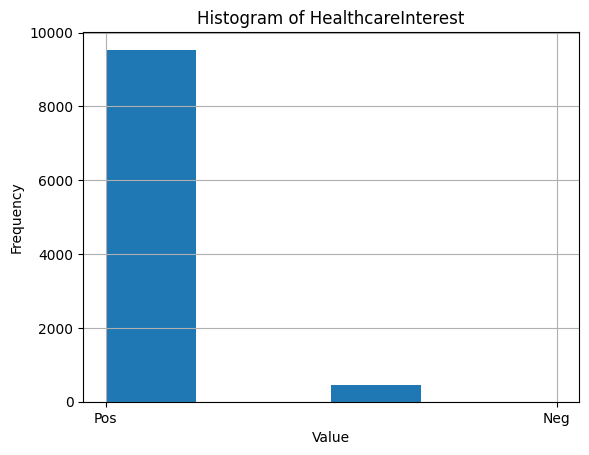

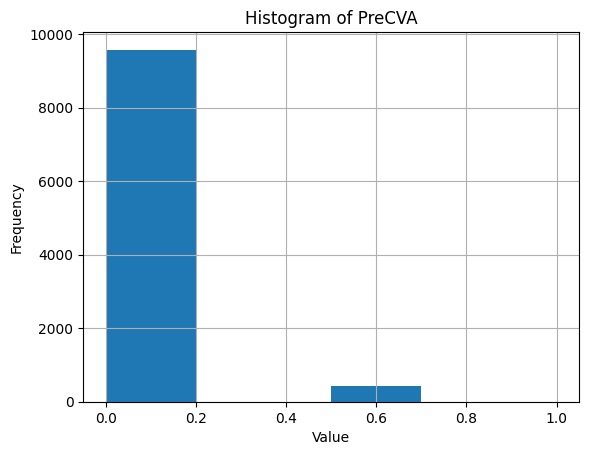

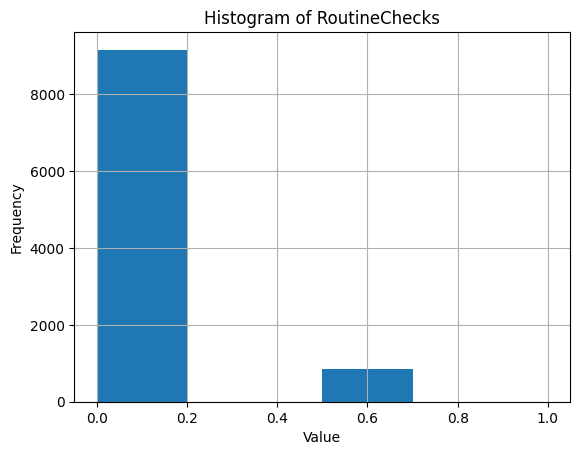

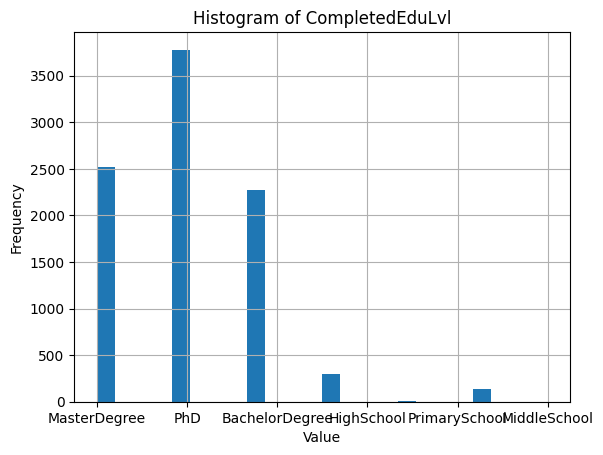

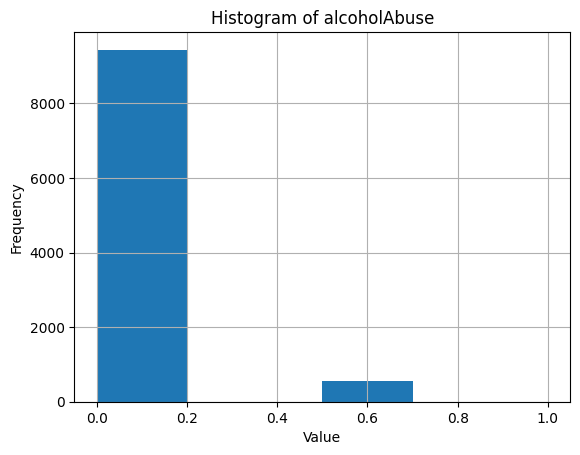

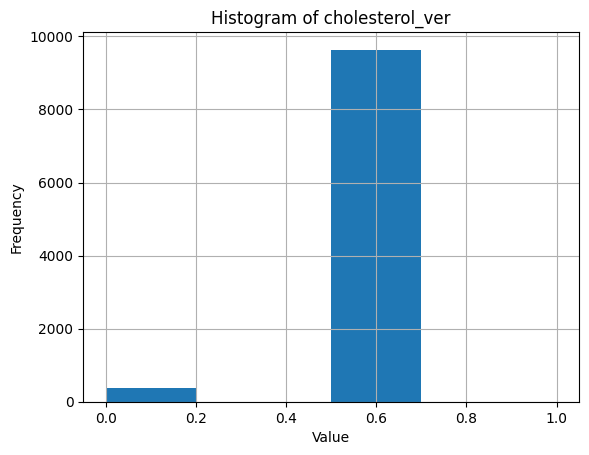

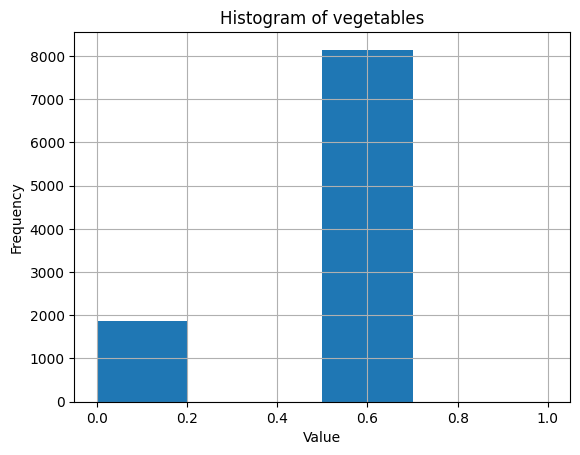

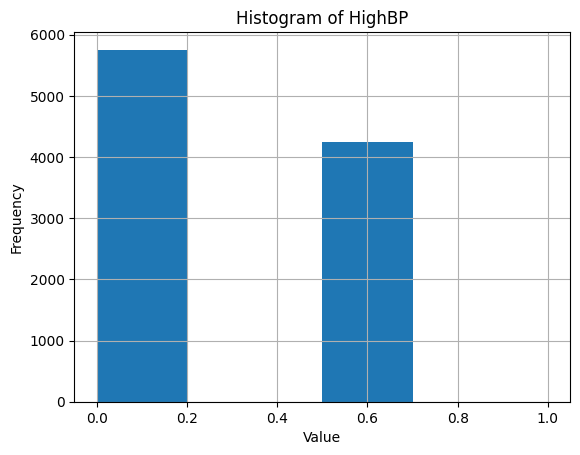

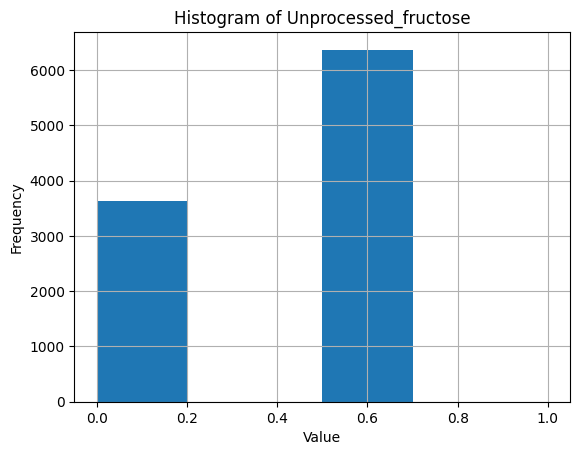

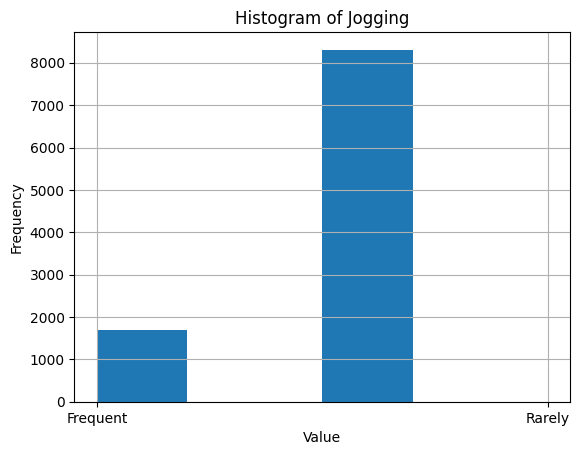

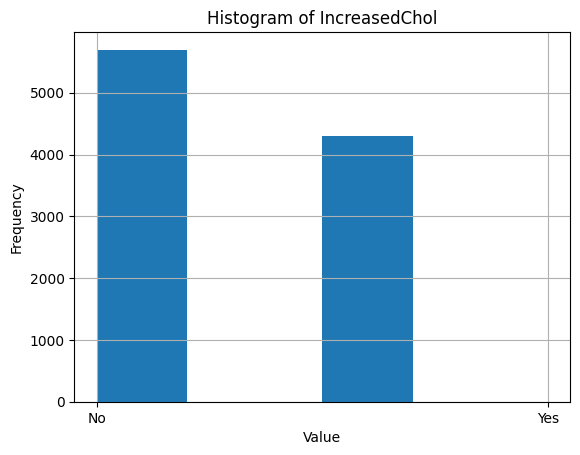

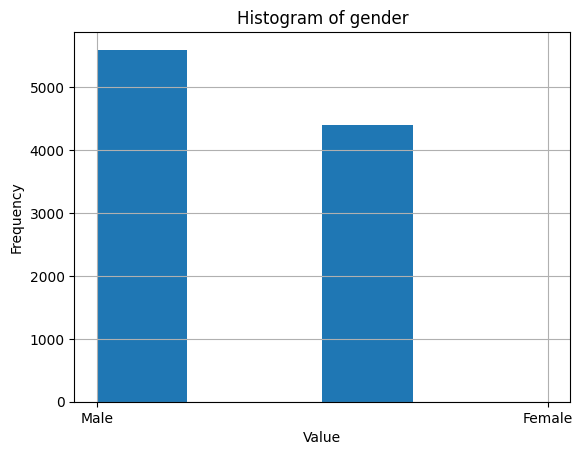

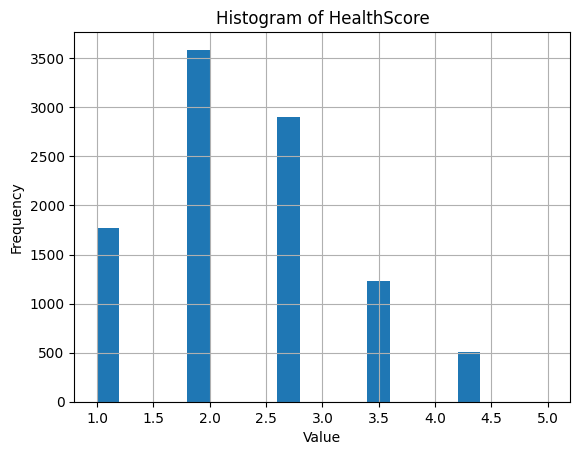

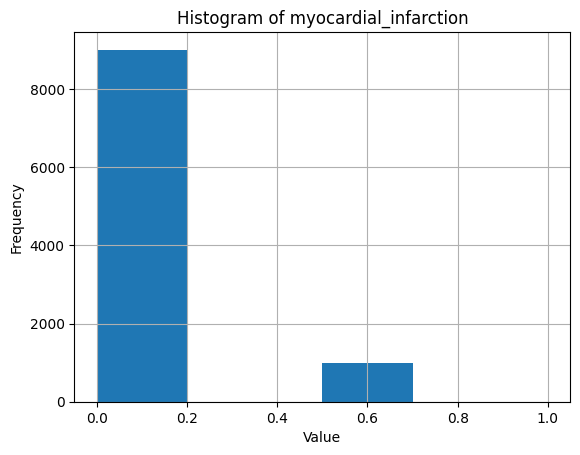

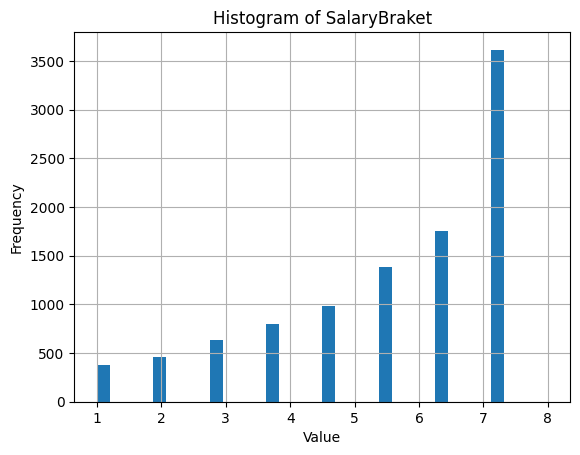

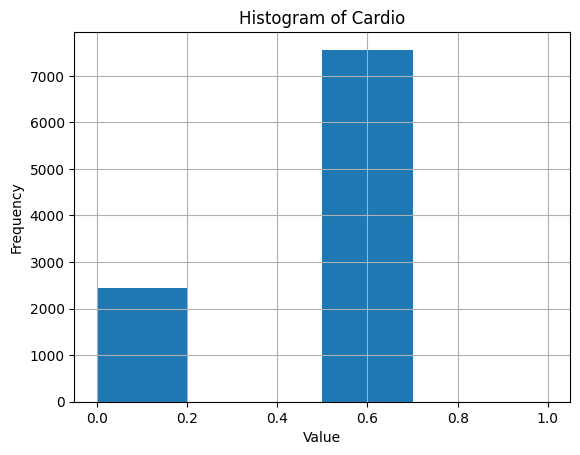

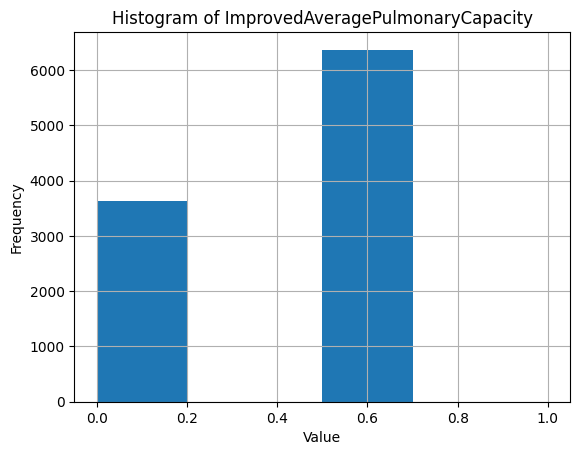

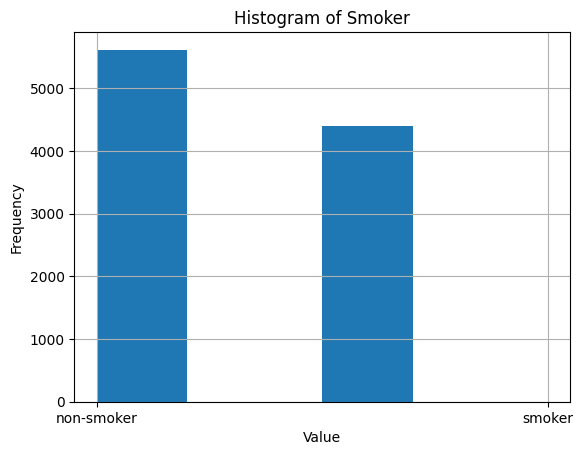

In [13]:
for attribute in diabet_ordinal_discrete_attr:
    diabet_full_data[attribute].hist(bins=diabet_full_data[attribute].value_counts().shape[0], width=0.2)
    plt.title('Histogram of ' + attribute)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Credit_risk dataset ordinal and discrete values

In [14]:
credit_risk_discrete_ordinal_attr = ['residential_status', 'loan_purpose', 'loan_rating', 'credit_history_default_status', 'stability_rating']
credit_risk_discrete_ordinal_count = credit_risk_full_data[credit_risk_discrete_ordinal_attr].count()
credit_risk_discrete_ordinal_unique = credit_risk_full_data[credit_risk_discrete_ordinal_attr].nunique()
credit_risk_discrete_ordinal_table = pd.DataFrame({'count': credit_risk_discrete_ordinal_count, 'unique': credit_risk_discrete_ordinal_unique})
credit_risk_discrete_ordinal_table

,count,unique
residential_status,10000,4
loan_purpose,10000,6
loan_rating,10000,7
credit_history_default_status,10000,2
stability_rating,10000,4


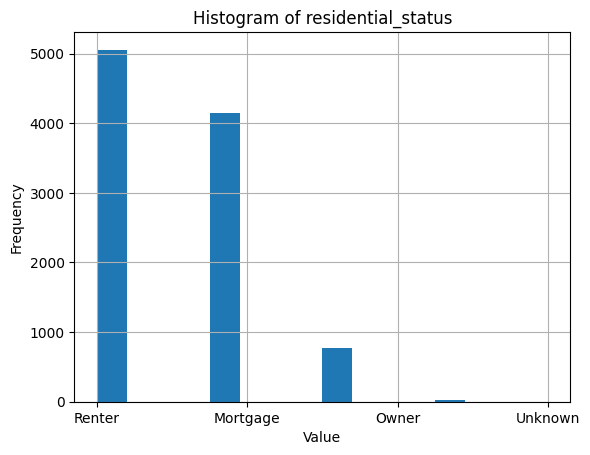

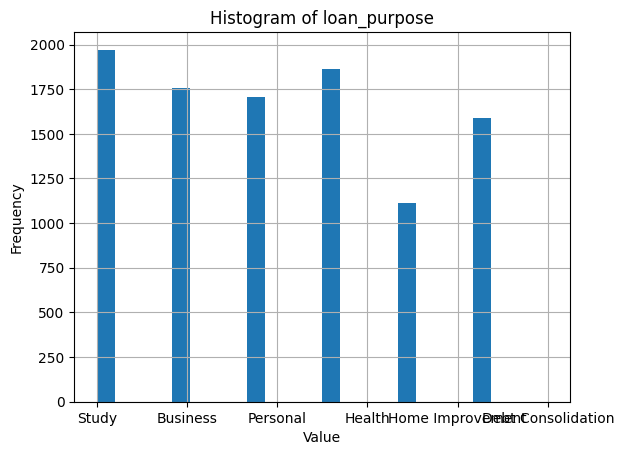

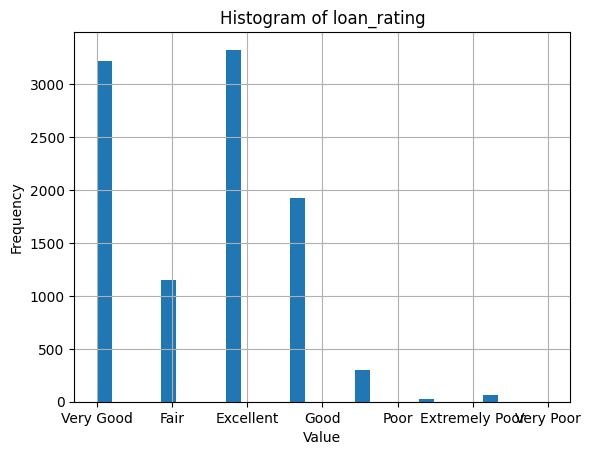

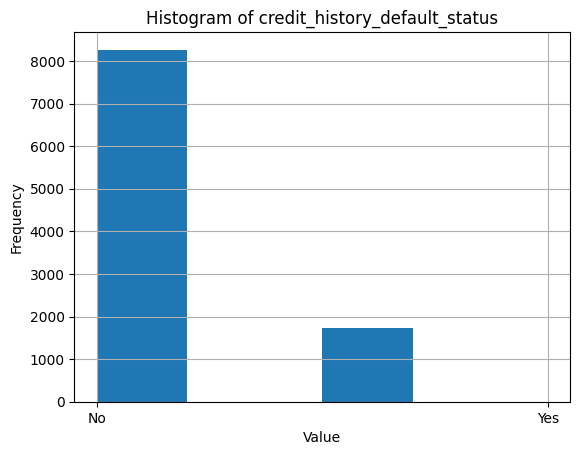

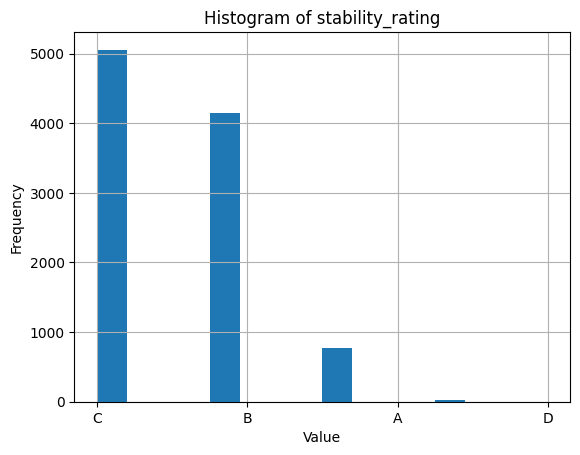

In [15]:
for attribute in credit_risk_discrete_ordinal_attr:
    credit_risk_full_data[attribute].hist(bins=credit_risk_full_data[attribute].value_counts().shape[0], width=0.2)
    plt.title('Histogram of ' + attribute)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

3.2. Analiza echilibrului de clase
Set de date Diabet

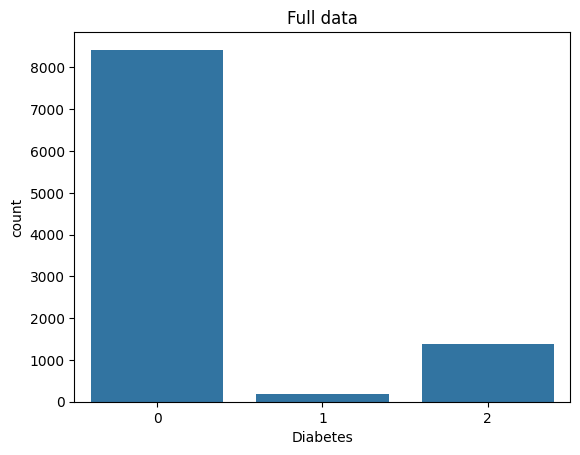

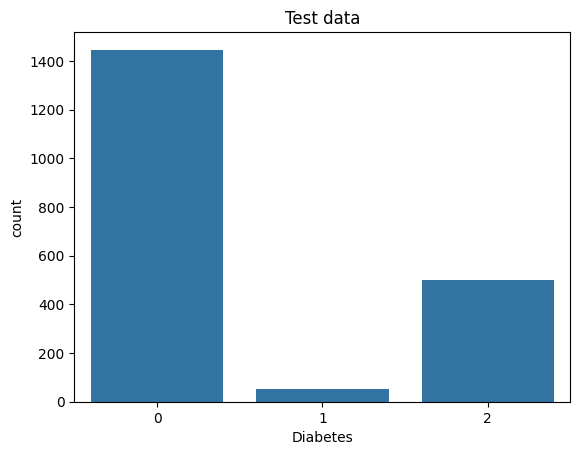

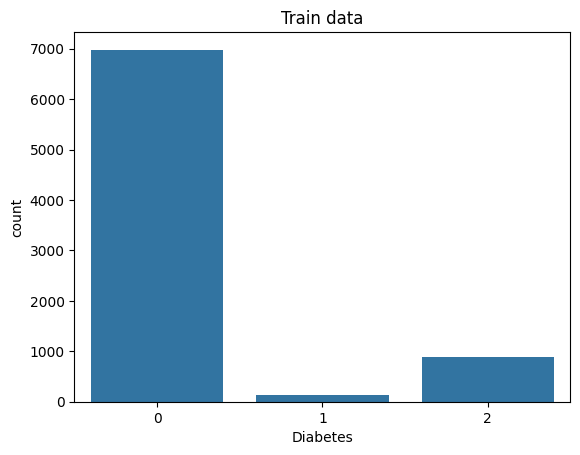

In [16]:
datasets = [diabet_full_data, diabet_test_data, diabet_train_data]
i = 0
for dataset in datasets:
    #create a barplot of diabet
    sb.countplot(data=dataset, x='Diabetes')
    if i == 0:
        plt.title("Full data")
    elif i == 1:
        plt.title("Test data")
    else:
        plt.title("Train data")
    plt.show()
    i+= 1

Analiza echilibrului de date credit_risk dataset

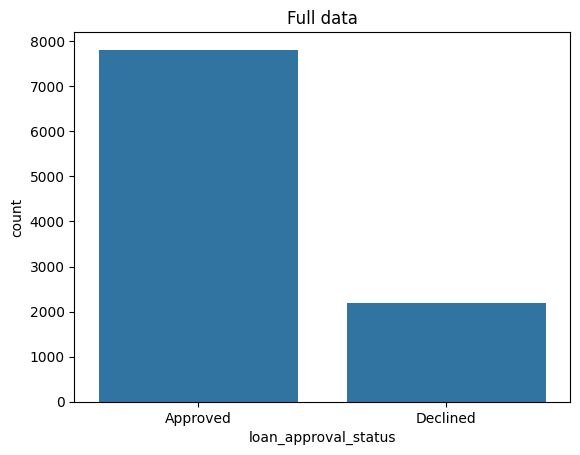

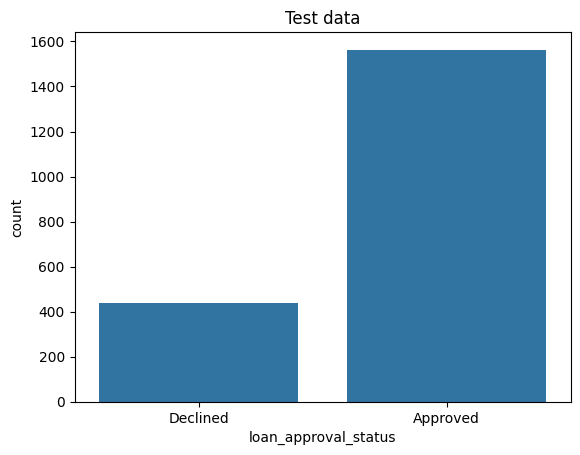

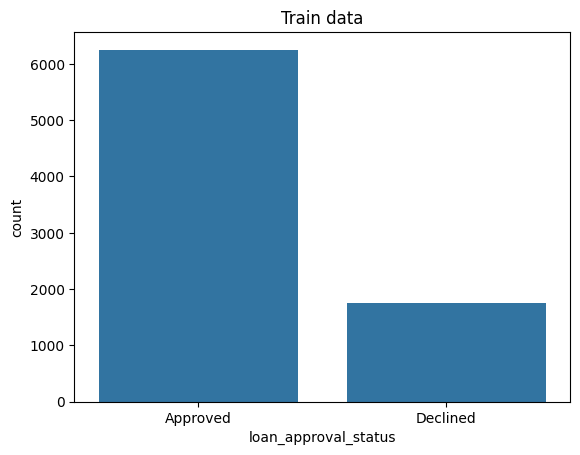

In [17]:
datasets = [credit_risk_full_data, credit_risk_test_data, credit_risk_train_data]
i = 0
for dataset in datasets:
    #create a barplot of diabet
    sb.countplot(data=dataset, x='loan_approval_status')
    if i == 0:
        plt.title("Full data")
    elif i == 1:
        plt.title("Test data")
    else:
        plt.title("Train data")
    plt.show()
    i+= 1

3.1.3.1 Analiza corelatiei intre atribute
Set de date diabet

In [18]:
corr_mat = diabet_full_data[diabet_numeric_attr].corr(method = 'pearson')
corr_mat

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate
psychological-rating,1.000000,0.137346,0.102714,0.348891,0.054565,0.098969
BodyMassIndex,0.137346,1.000000,-0.027297,0.088760,0.367735,-0.031751
Age,0.102714,-0.027297,1.000000,-0.091496,0.004131,0.998715
CognitionScore,0.348891,0.088760,-0.091496,1.000000,0.031467,-0.092739
Body_Stats,0.054565,0.367735,0.004131,0.031467,1.000000,0.001973
Metabolical_Rate,0.098969,-0.031751,0.998715,-0.092739,0.001973,1.000000


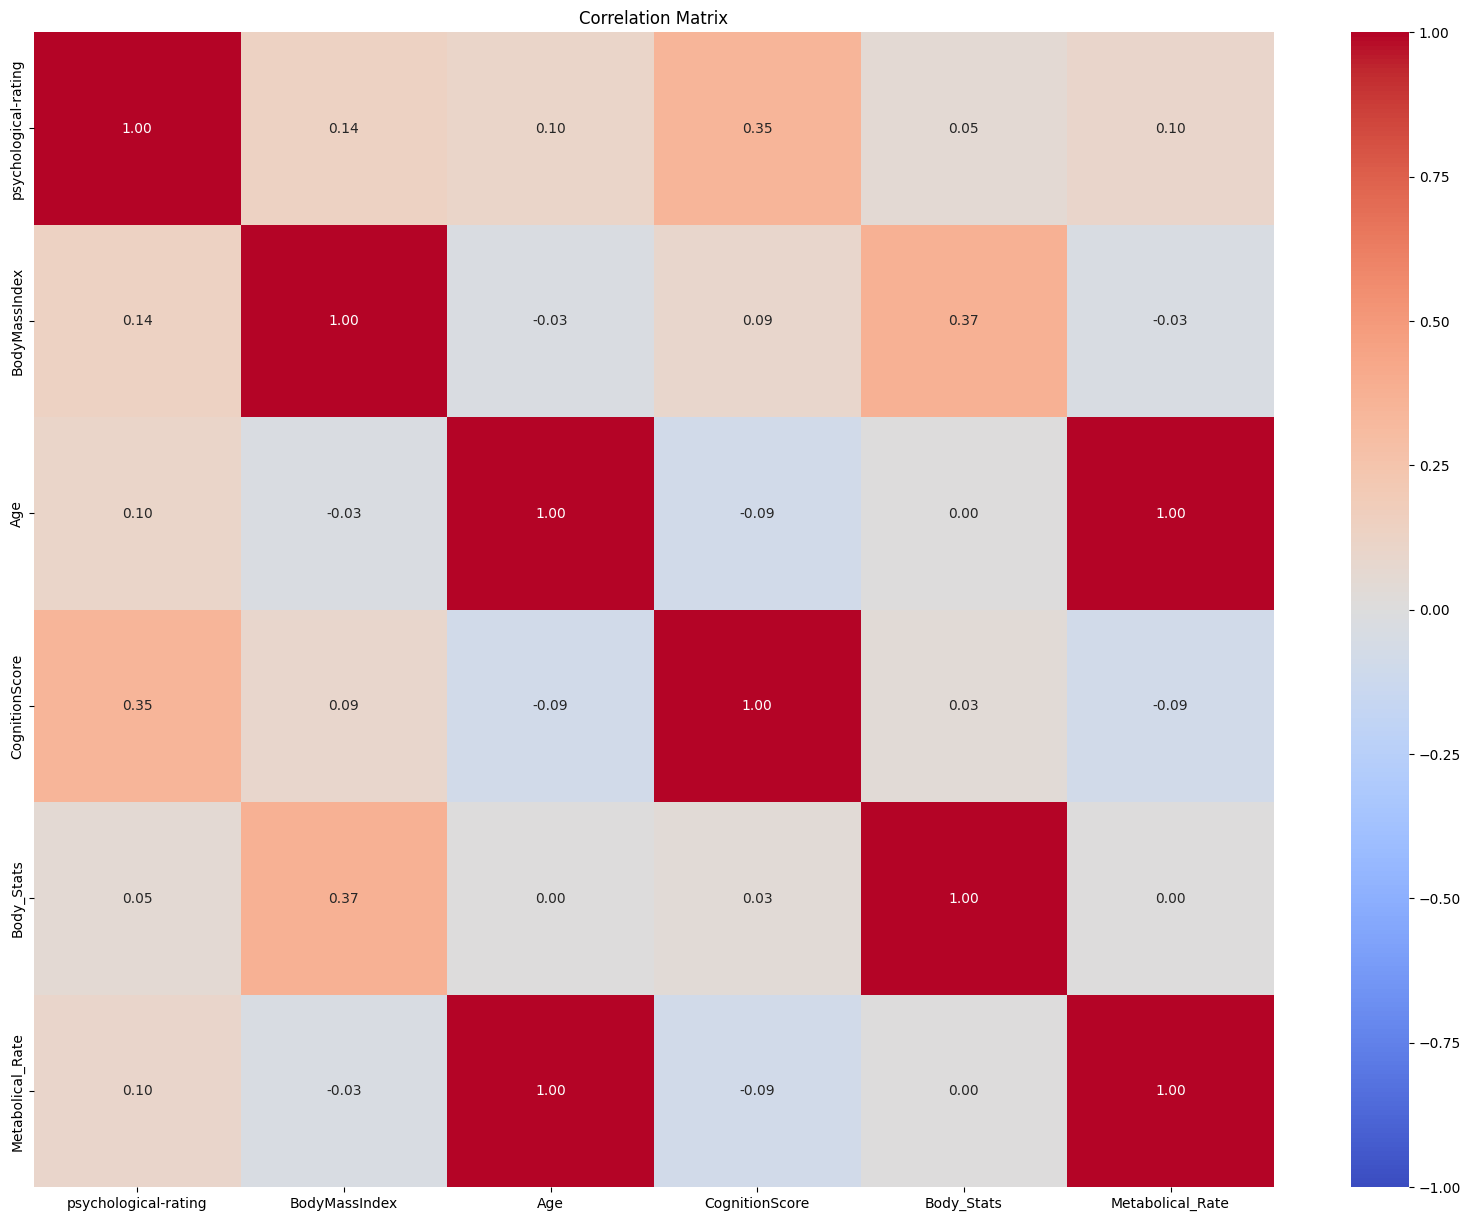

In [19]:
def plot_corr_matrix(corr_mat):
    plt.figure(figsize=(20, 15))
    sb.heatmap(corr_mat, annot=True, fmt=".2f", vmin = -1, vmax = 1, cmap = 'coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
plot_corr_matrix(corr_mat)

3.1.3.2. Setul de date credit_risk

In [20]:
corr_mat_credit = credit_risk_full_data[credit_risk_numeric_attr].corr(method = 'pearson')
corr_mat_credit

,applicant_age,applicant_income,job_tenure_years,loan_amount,loan_rate,loan_income_ratio,credit_history_length_years,credit_history_length_months
applicant_age,1.000000,0.128489,0.135319,0.042126,0.008628,-0.034919,0.858263,0.856350
applicant_income,0.128489,1.000000,0.126753,0.279601,-0.000682,-0.271204,0.113971,0.114272
job_tenure_years,0.135319,0.126753,1.000000,0.112941,-0.057938,-0.049490,0.115380,0.115492
loan_amount,0.042126,0.279601,0.112941,1.000000,0.160547,0.577721,0.030215,0.030088
loan_rate,0.008628,-0.000682,-0.057938,0.160547,1.000000,0.132404,0.012147,0.011846
loan_income_ratio,-0.034919,-0.271204,-0.049490,0.577721,0.132404,1.000000,-0.032349,-0.032182
credit_history_length_years,0.858263,0.113971,0.115380,0.030215,0.012147,-0.032349,1.000000,0.997919
credit_history_length_months,0.856350,0.114272,0.115492,0.030088,0.011846,-0.032182,0.997919,1.000000


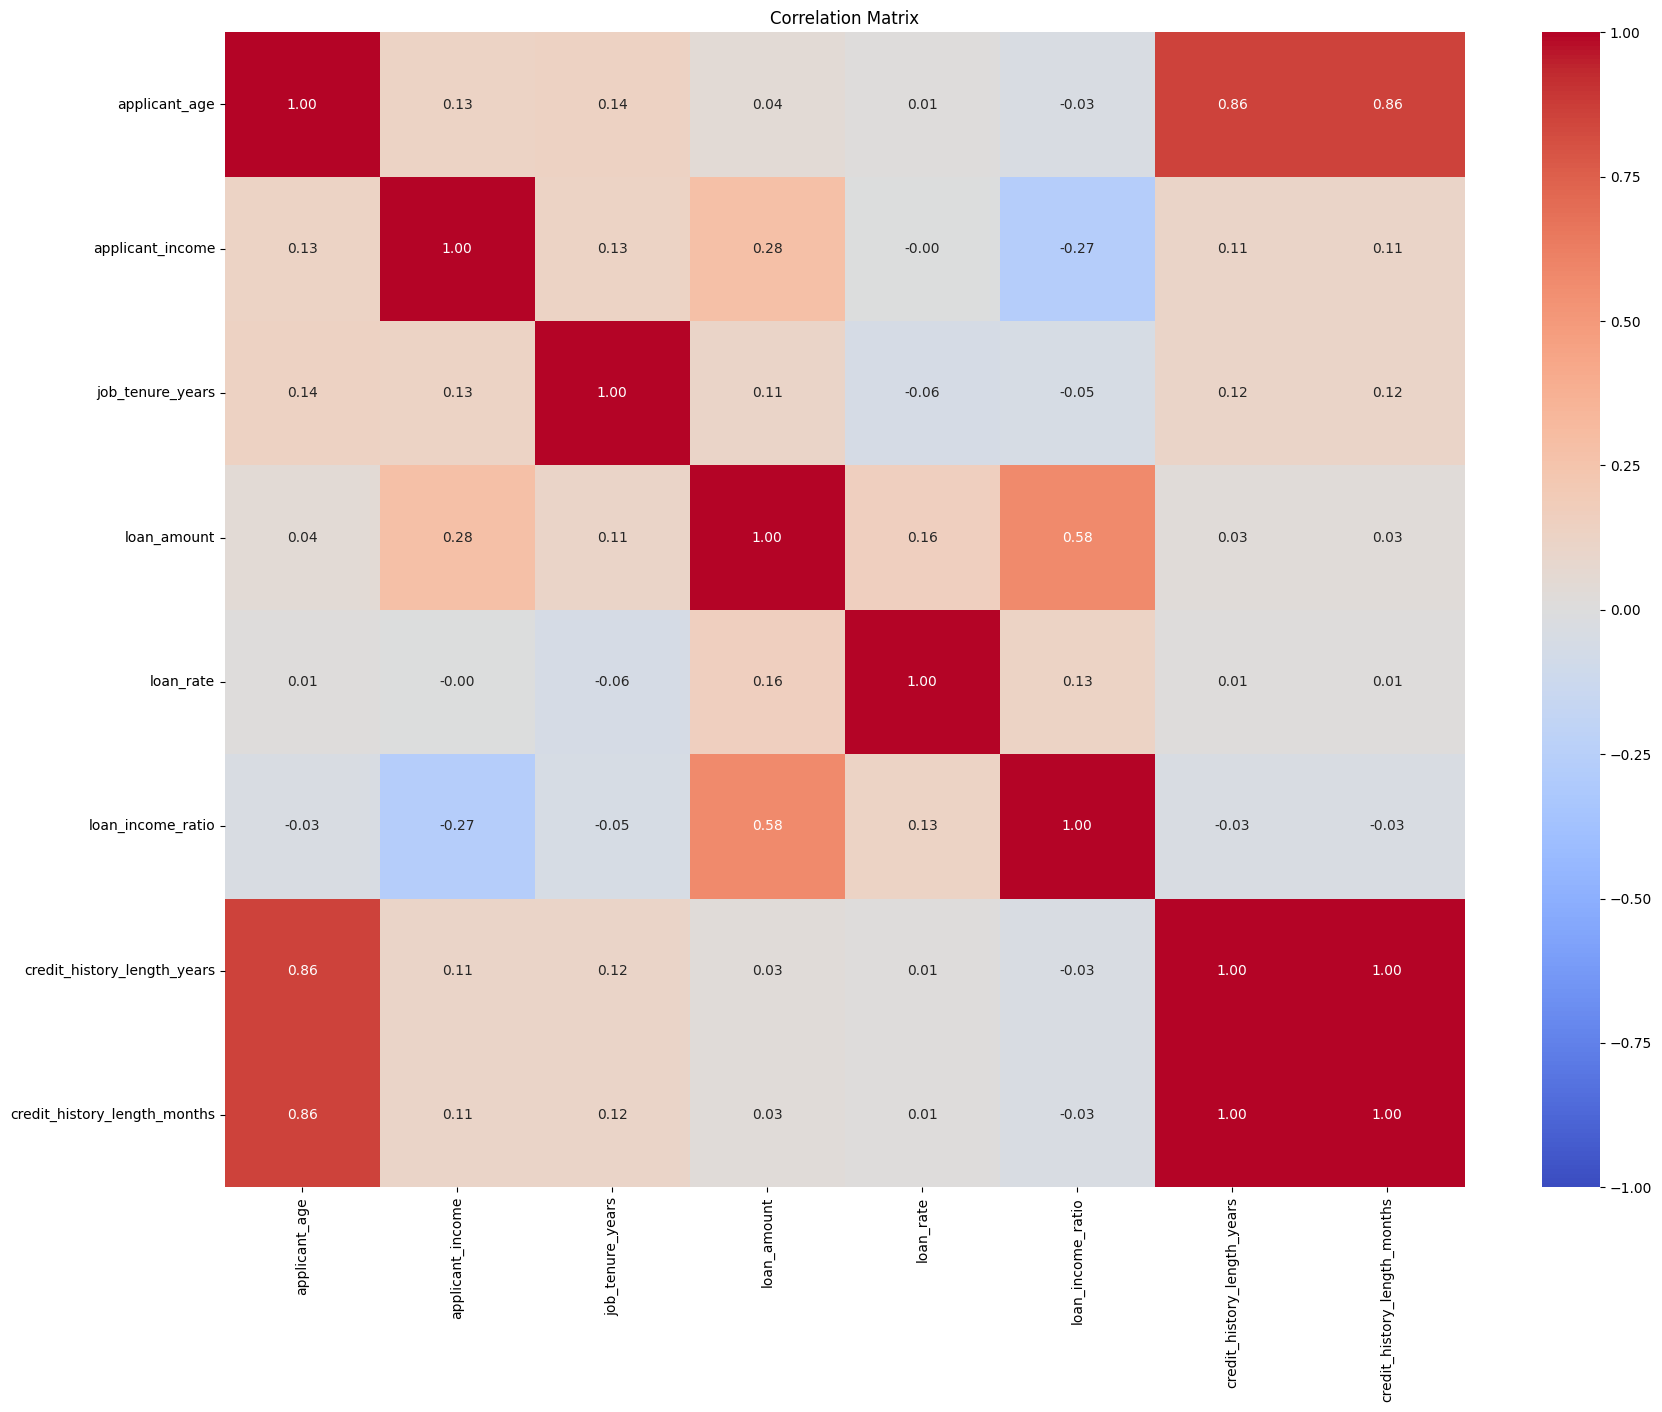

In [21]:
plot_corr_matrix(corr_mat_credit)

3.1.3.2. Analize intre atributele categorice
Setul de date Diabet

In [22]:
#get core matrix using chi 2 method
def chi2_test_of_independence(data, attr1, attr2):
    contingency_table = pd.crosstab(data[attr1], data[attr2])
    _, p, _, _ = chi2_contingency(contingency_table)
    return 1 - p
corr_mat_diabetes_chi2 = pd.DataFrame(index=diabet_ordinal_discrete_attr, columns=diabet_ordinal_discrete_attr)
for attr1 in diabet_ordinal_discrete_attr:
    for attr2 in diabet_ordinal_discrete_attr:
        if attr1 == attr2:
            corr_mat_diabetes_chi2.loc[attr1, attr2] = 1
            continue
        corr_mat_diabetes_chi2.loc[attr1, attr2] = float(chi2_test_of_independence(diabet_full_data, attr1, attr2))
corr_mat_diabetes_chi2 = corr_mat_diabetes_chi2.astype(float)
corr_mat_diabetes_chi2

,HealthcareInterest,PreCVA,RoutineChecks,CompletedEduLvl,alcoholAbuse,cholesterol_ver,vegetables,HighBP,Unprocessed_fructose,Jogging,IncreasedChol,gender,HealthScore,myocardial_infarction,SalaryBraket,Cardio,ImprovedAveragePulmonaryCapacity,Smoker
HealthcareInterest,1.000000,0.532517,1.000000,1.000000,0.999977,1.000000,0.932094,0.999301,0.999762,0.578119,0.999999,0.391988,0.999942,0.981227,1.000000,0.998532,0.999762,0.998856
PreCVA,0.532517,1.000000,0.998870,1.000000,0.607375,0.930582,0.999579,1.000000,0.990318,1.000000,1.000000,0.555641,1.000000,1.000000,1.000000,1.000000,0.990318,1.000000
RoutineChecks,1.000000,0.998870,1.000000,1.000000,0.060479,0.999355,0.959673,0.727820,0.999989,1.000000,0.728004,0.999998,1.000000,0.999182,1.000000,1.000000,0.999989,1.000000
CompletedEduLvl,1.000000,1.000000,1.000000,1.000000,0.976403,0.716077,1.000000,1.000000,1.000000,1.000000,1.000000,0.870074,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
alcoholAbuse,0.999977,0.607375,0.060479,0.976403,1.000000,0.990301,0.355668,0.603970,0.998398,0.989114,0.604818,0.808069,0.961438,0.999914,0.998497,0.762771,0.998398,1.000000
cholesterol_ver,1.000000,0.930582,0.999355,0.716077,0.990301,1.000000,0.768185,1.000000,0.972899,0.999996,1.000000,0.994469,1.000000,0.999996,0.156600,0.330694,0.972899,0.815096
vegetables,0.932094,0.999579,0.959673,1.000000,0.355668,0.768185,1.000000,0.999994,1.000000,1.000000,0.999420,1.000000,1.000000,0.999176,1.000000,1.000000,1.000000,0.999954
HighBP,0.999301,1.000000,0.727820,1.000000,0.603970,1.000000,0.999994,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Unprocessed_fructose,0.999762,0.990318,0.999989,1.000000,0.998398,0.972899,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.651120,1.000000,1.000000,1.000000,1.000000
Jogging,0.578119,1.000000,1.000000,1.000000,0.989114,0.999996,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


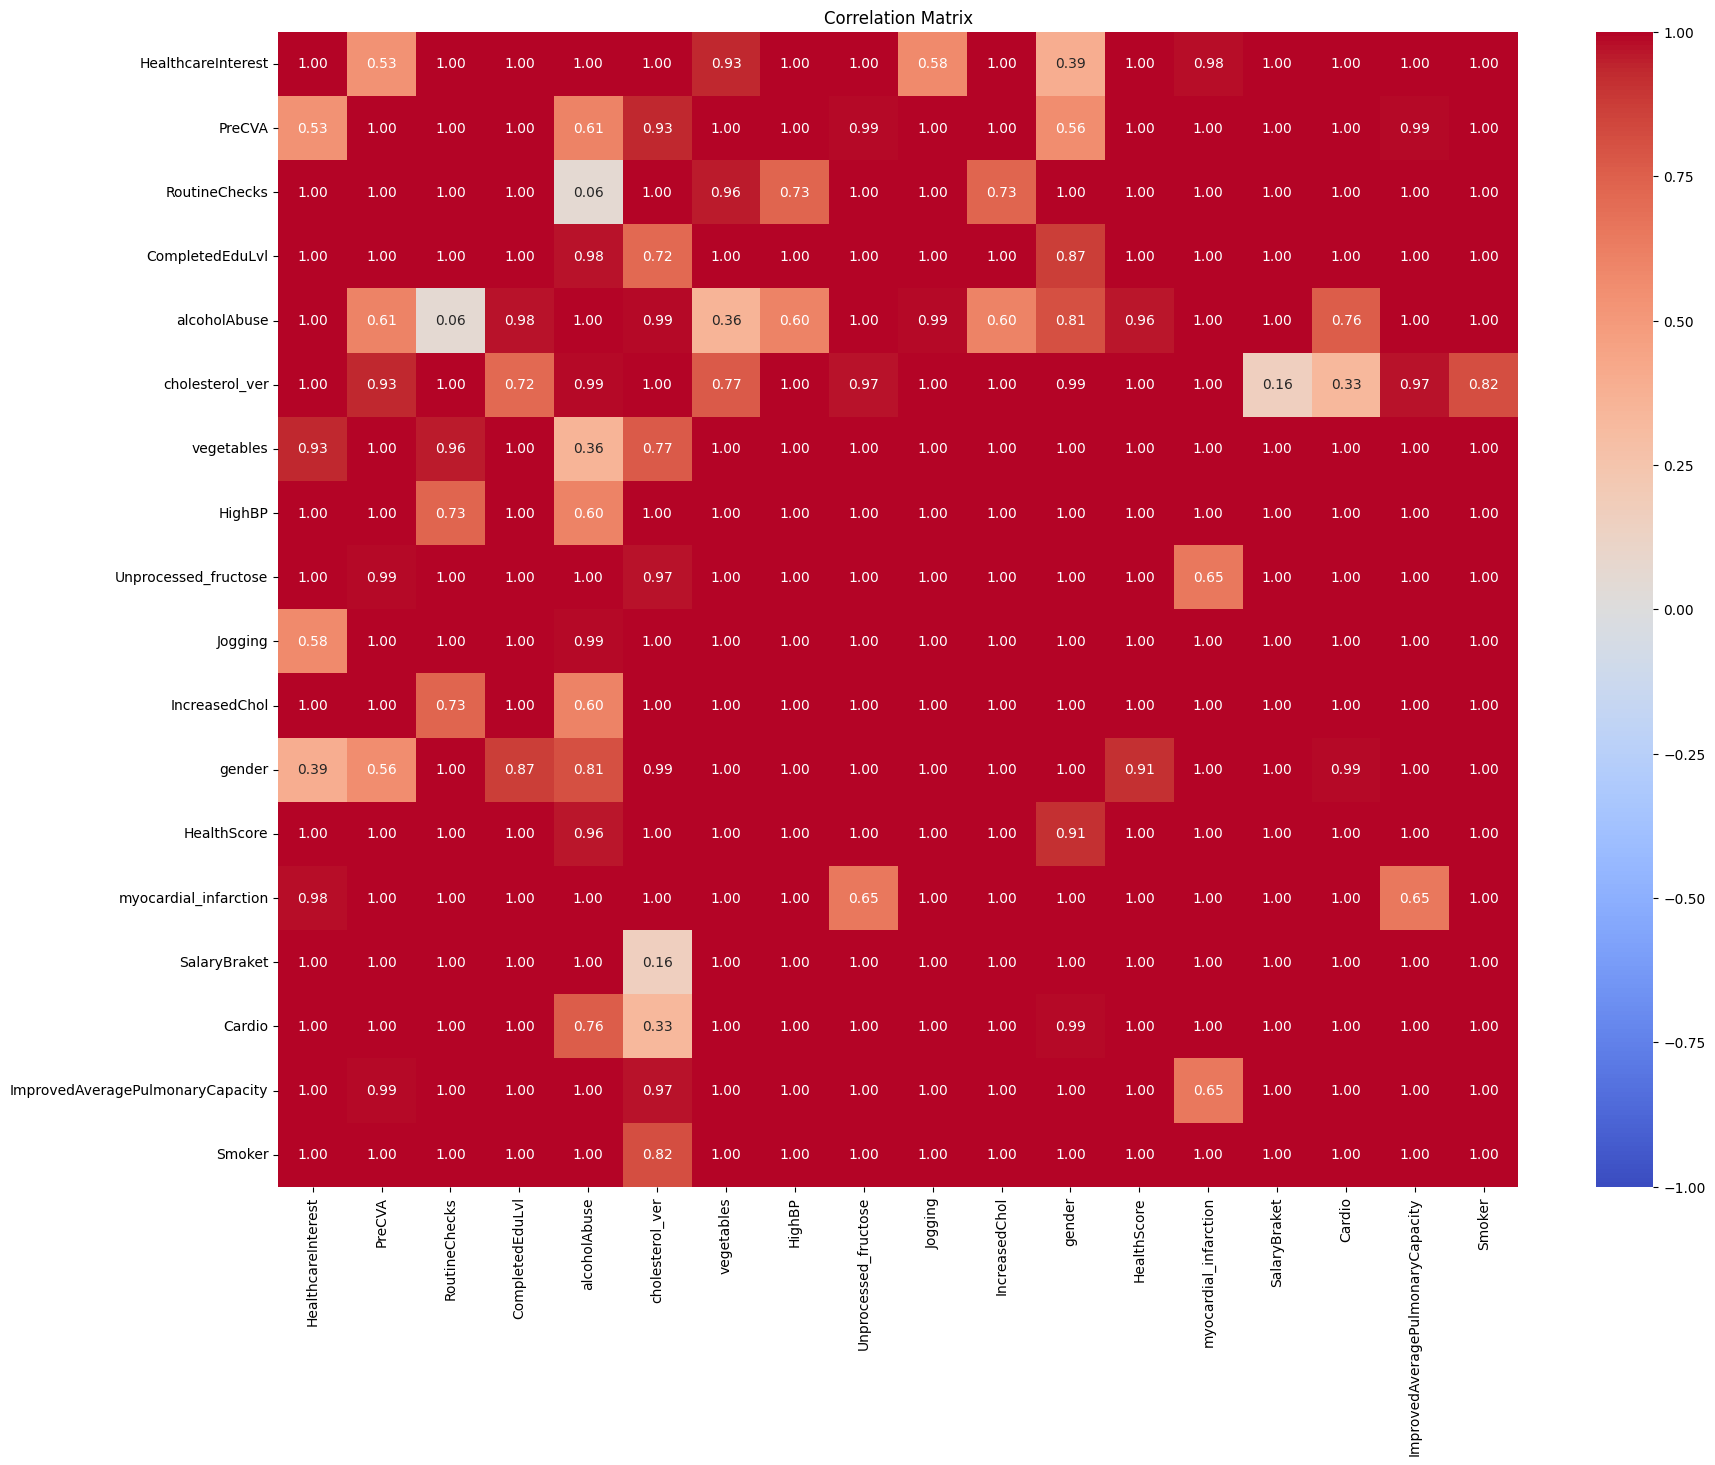

In [23]:
plot_corr_matrix(corr_mat_diabetes_chi2)

Analize atribute categorice set credit_risk

In [24]:
corr_mat_credit_chi2 = pd.DataFrame(index=credit_risk_discrete_ordinal_attr, columns=credit_risk_discrete_ordinal_attr)
for attr1 in credit_risk_discrete_ordinal_attr:
    for attr2 in credit_risk_discrete_ordinal_attr:
        if attr1 == attr2:
            corr_mat_credit_chi2.loc[attr1, attr2] = 1
            continue
        corr_mat_credit_chi2.loc[attr1, attr2] = float(chi2_test_of_independence(credit_risk_full_data, attr1, attr2))
corr_mat_credit_chi2 = corr_mat_credit_chi2.astype(float)
corr_mat_credit_chi2

,residential_status,loan_purpose,loan_rating,credit_history_default_status,stability_rating
residential_status,1.000000,1.000000,1.000000,0.999945,1.000000
loan_purpose,1.000000,1.000000,0.846785,0.722777,1.000000
loan_rating,1.000000,0.846785,1.000000,1.000000,1.000000
credit_history_default_status,0.999945,0.722777,1.000000,1.000000,0.999945
stability_rating,1.000000,1.000000,1.000000,0.999945,1.000000


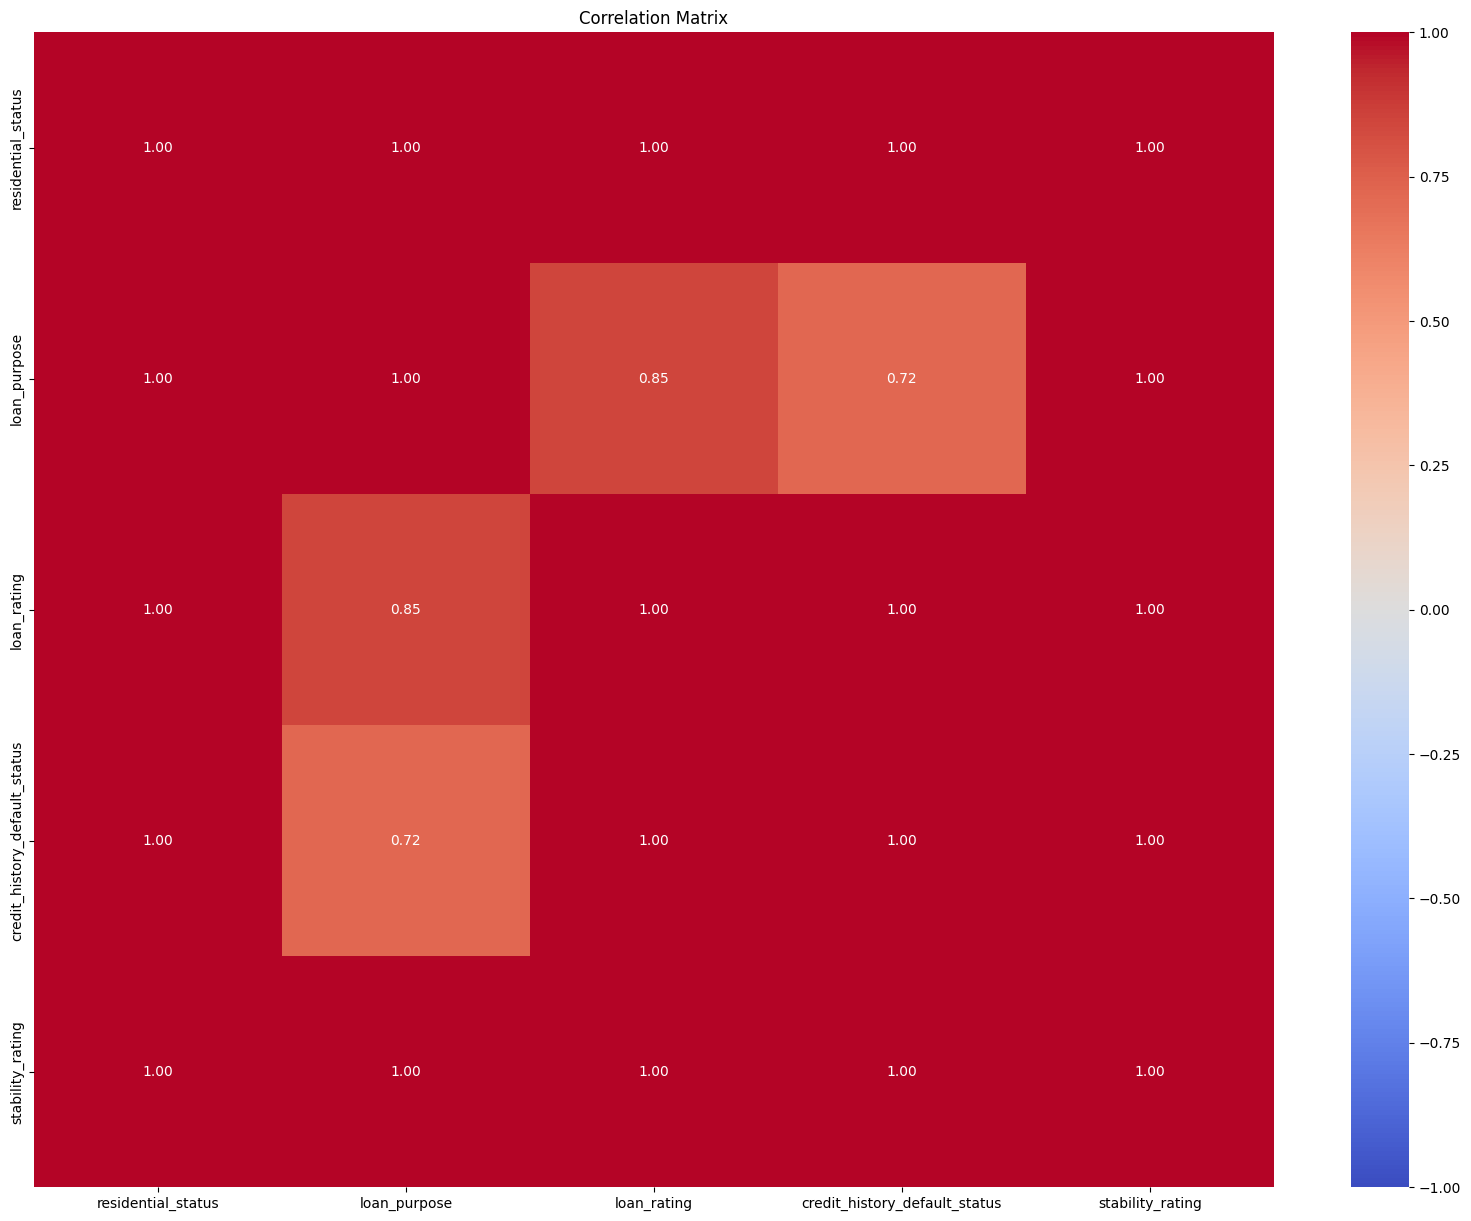

In [25]:
plot_corr_matrix(corr_mat_credit_chi2)

3.2. Preprocesarea datelor
1. Date lipsa pentru un atribut intr-un esantion
Set de date diabet

In [26]:
def fill_missing_values(dataset, attributes, strategy):
    if strategy == 'Iterative':
        imputer = IterativeImputer(max_iter=10, random_state=0)
    elif strategy == 'Simple':
        imputer = SimpleImputer(strategy='most_frequent')
    imputer = imputer.fit(dataset[attributes])
    dataset[attributes] = imputer.transform(dataset[attributes])
    return dataset[attributes]


In [98]:
diabet_train_data_filled = diabet_train_data.copy()
diabet_train_data_filled[diabet_numeric_attr] = fill_missing_values(diabet_train_data_filled, diabet_numeric_attr, 'Iterative')
diabet_train_data_filled[diabet_ordinal_discrete_attr] = fill_missing_values(diabet_train_data_filled, diabet_ordinal_discrete_attr, 'Simple')
diabet_test_data_filled = diabet_test_data.copy()
diabet_test_data_filled[diabet_numeric_attr] = fill_missing_values(diabet_test_data_filled, diabet_numeric_attr, 'Iterative')
diabet_test_data_filled[diabet_ordinal_discrete_attr] = fill_missing_values(diabet_test_data_filled, diabet_ordinal_discrete_attr, 'Simple')
diabet_full_data_filled = diabet_full_data.copy()
diabet_full_data_filled[diabet_numeric_attr] = fill_missing_values(diabet_full_data_filled, diabet_numeric_attr, 'Iterative')
diabet_full_data_filled[diabet_ordinal_discrete_attr] = fill_missing_values(diabet_full_data_filled, diabet_ordinal_discrete_attr, 'Simple')

0       0
1       0
2       0
3       0
4       0
       ..
9995    2
9996    2
9997    2
9998    2
9999    2
Name: Diabetes, Length: 10000, dtype: int64


In [28]:
diabet_full_data_filled[diabet_numeric_attr]

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate
0,15.0,24.0,9.0,0.0,160.118630,236.491591
1,0.0,32.0,8.0,0.0,195.982181,213.377914
2,0.0,28.0,9.0,1.0,161.797252,240.254471
3,0.0,28.0,9.0,0.0,183.174832,239.997559
4,2.0,35.0,6.0,10.0,218.467800,183.438161
...,...,...,...,...,...,...
9995,0.0,41.0,8.0,0.0,242.212570,221.812882
9996,0.0,31.0,11.0,0.0,189.876327,280.139381
9997,0.0,24.0,10.0,1.0,158.092442,256.405648
9998,2.0,36.0,10.0,1.0,220.979203,257.483393


In [29]:
diabet_full_data_filled[diabet_ordinal_discrete_attr]

,HealthcareInterest,PreCVA,RoutineChecks,CompletedEduLvl,alcoholAbuse,cholesterol_ver,vegetables,HighBP,Unprocessed_fructose,Jogging,IncreasedChol,gender,HealthScore,myocardial_infarction,SalaryBraket,Cardio,ImprovedAveragePulmonaryCapacity,Smoker
0,Pos,0,0,MasterDegree,0,1,1,0,0,Frequent,No,Male,4,0,5,0,0,non-smoker
1,Pos,0,0,PhD,0,1,1,1,1,Rarely,No,Male,3,0,8,1,1,smoker
2,Pos,0,0,PhD,0,1,1,1,1,Rarely,Yes,Male,3,0,6,1,1,non-smoker
3,Pos,0,0,PhD,0,1,1,1,1,Rarely,Yes,Female,1,0,8,1,1,non-smoker
4,Pos,0,0,BachelorDegree,0,1,1,0,0,Rarely,No,Male,3,0,8,0,0,non-smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Pos,0,0,MasterDegree,0,1,1,1,1,Rarely,Yes,Male,3,0,6,1,1,smoker
9996,Pos,0,0,PhD,0,1,1,1,1,Rarely,Yes,Female,3,0,7,1,1,non-smoker
9997,Pos,0,0,PhD,0,1,1,1,1,Rarely,Yes,Female,2,0,8,1,1,non-smoker
9998,Pos,0,0,MasterDegree,0,1,1,1,1,Frequent,No,Female,3,0,7,1,1,smoker


Credit_risk data set

In [30]:
credit_risk_train_data_filled = credit_risk_train_data.copy()
credit_risk_train_data_filled[credit_risk_numeric_attr] = fill_missing_values(credit_risk_train_data_filled, credit_risk_numeric_attr, 'Iterative')
credit_risk_train_data_filled[credit_risk_discrete_ordinal_attr] = fill_missing_values(credit_risk_train_data_filled, credit_risk_discrete_ordinal_attr, 'Simple')
credit_risk_test_data_filled = credit_risk_test_data.copy()
credit_risk_test_data_filled[credit_risk_numeric_attr] = fill_missing_values(credit_risk_test_data_filled, credit_risk_numeric_attr, 'Iterative')
credit_risk_test_data_filled[credit_risk_discrete_ordinal_attr] = fill_missing_values(credit_risk_test_data_filled, credit_risk_discrete_ordinal_attr, 'Simple')
credit_risk_full_data_filled = credit_risk_full_data.copy()
credit_risk_full_data_filled[credit_risk_numeric_attr] = fill_missing_values(credit_risk_full_data_filled, credit_risk_numeric_attr, 'Iterative')
credit_risk_full_data_filled[credit_risk_discrete_ordinal_attr] = fill_missing_values(credit_risk_full_data_filled, credit_risk_discrete_ordinal_attr, 'Simple')

In [31]:
credit_risk_full_data_filled[credit_risk_numeric_attr]

,applicant_age,applicant_income,job_tenure_years,loan_amount,loan_rate,loan_income_ratio,credit_history_length_years,credit_history_length_months
0,25.0,36276.0,0.000000,5600.0,9.990000,0.15,4.0,59.0
1,24.0,64000.0,5.000000,12000.0,16.770000,0.19,2.0,34.0
2,21.0,12360.0,2.243158,5000.0,10.750000,0.40,4.0,54.0
3,36.0,83625.0,6.000000,13200.0,7.510000,0.16,12.0,151.0
4,23.0,24091.0,5.000000,3500.0,12.990000,0.15,2.0,31.0
...,...,...,...,...,...,...,...,...
9995,22.0,48000.0,7.000000,7500.0,17.040000,0.16,2.0,27.0
9996,22.0,19200.0,0.000000,2400.0,10.590000,0.13,3.0,42.0
9997,25.0,82000.0,5.000000,6000.0,10.572516,0.07,3.0,44.0
9998,24.0,25000.0,3.000000,1600.0,12.530000,0.06,3.0,40.0


In [32]:
credit_risk_full_data_filled[credit_risk_discrete_ordinal_attr]

,residential_status,loan_purpose,loan_rating,credit_history_default_status,stability_rating
0,Renter,Study,Very Good,No,C
1,Mortgage,Business,Fair,No,B
2,Renter,Business,Very Good,No,C
3,Mortgage,Personal,Excellent,No,B
4,Mortgage,Health,Good,Yes,B
...,...,...,...,...,...
9995,Renter,Business,Poor,Yes,C
9996,Owner,Business,Very Good,No,A
9997,Renter,Home Improvement,Good,No,C
9998,Renter,Personal,Good,No,C


3.2.2. Valori extreme pentru un atribut esantion

In [33]:
def replace_extreme_values(dataset, attributes, low_percentile, high_percentile, tolerance = 1.5):
    for attribute in attributes:
        imputer = IterativeImputer(max_iter=10, random_state=0)
        low_threshold = dataset[attribute].quantile(low_percentile)
        high_threshold = dataset[attribute].quantile(high_percentile)
        lower_bound = low_threshold - tolerance * (high_threshold - low_threshold)
        upper_bound = high_threshold + tolerance * (high_threshold - low_threshold)
        dataset.loc[dataset[attribute] < lower_bound, attribute] = np.nan
        dataset.loc[dataset[attribute] > upper_bound, attribute] = np.nan
        dataset[attribute] = imputer.fit_transform(dataset[[attribute]])
    return dataset[attributes]

In [99]:
diabet_train_data_replaced = diabet_train_data_filled.copy()
diabet_train_data_replaced[diabet_numeric_attr] = replace_extreme_values(diabet_train_data_replaced, diabet_numeric_attr, 0.20, 0.80)
diabet_test_data_replaced = diabet_test_data_filled.copy()
diabet_test_data_replaced[diabet_numeric_attr] = replace_extreme_values(diabet_test_data_replaced, diabet_numeric_attr, 0.20, 0.80)
diabet_full_data_replaced = diabet_full_data_filled.copy()
diabet_full_data_replaced[diabet_numeric_attr] = replace_extreme_values(diabet_full_data_replaced, diabet_numeric_attr, 0.20, 0.80)



0       0
1       0
2       0
3       0
4       0
       ..
9995    2
9996    2
9997    2
9998    2
9999    2
Name: Diabetes, Length: 10000, dtype: int64


In [35]:
diabet_full_data_replaced[diabet_numeric_attr].describe()

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000
mean,1.033802,27.795542,8.0575,0.653987,176.031913,221.195726
std,2.119331,5.327069,3.0363,1.421019,27.927785,60.771809
min,0.000000,14.000000,1.0000,0.000000,105.063984,71.602207
25%,0.000000,24.000000,6.0000,0.000000,156.720671,180.047425
50%,0.000000,27.000000,8.0000,0.000000,174.042100,223.626893
75%,1.033802,31.000000,10.0000,0.653987,190.666843,262.384257
max,12.000000,45.000000,13.0000,7.000000,281.977027,327.936098


In [36]:
credit_risk_train_data_replaced = credit_risk_train_data_filled.copy()
credit_risk_train_data_replaced[credit_risk_numeric_attr] = replace_extreme_values(credit_risk_train_data_replaced, credit_risk_numeric_attr, 0.20, 0.80)
credit_risk_test_data_replaced = credit_risk_test_data_filled.copy()
credit_risk_test_data_replaced[credit_risk_numeric_attr] = replace_extreme_values(credit_risk_test_data_replaced, credit_risk_numeric_attr, 0.20, 0.80)
credit_risk_full_data_replaced = credit_risk_full_data_filled.copy()
credit_risk_full_data_replaced[credit_risk_numeric_attr] = replace_extreme_values(credit_risk_full_data_replaced, credit_risk_numeric_attr, 0.20, 0.80)

In [37]:
credit_risk_full_data_replaced[credit_risk_numeric_attr].describe()

,applicant_age,applicant_income,job_tenure_years,loan_amount,loan_rate,loan_income_ratio,credit_history_length_years,credit_history_length_months
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.233306,60128.805450,4.652444,9411.757899,11.006830,0.166963,5.671167,74.050988
std,5.114588,29328.483243,3.734704,6033.831852,3.112499,0.100526,3.700086,44.434391
min,20.000000,4200.000000,0.000000,500.000000,5.104274,0.000000,2.000000,25.000000
25%,23.000000,38595.000000,2.000000,5000.000000,8.070000,0.090000,3.000000,41.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.150000,4.000000,57.000000
75%,30.000000,75000.000000,7.000000,12000.000000,13.120915,0.230000,8.000000,101.000000
max,45.000000,160000.000000,18.000000,30000.000000,22.110000,0.500000,18.000000,224.000000


3.2.3. Atribute redundante

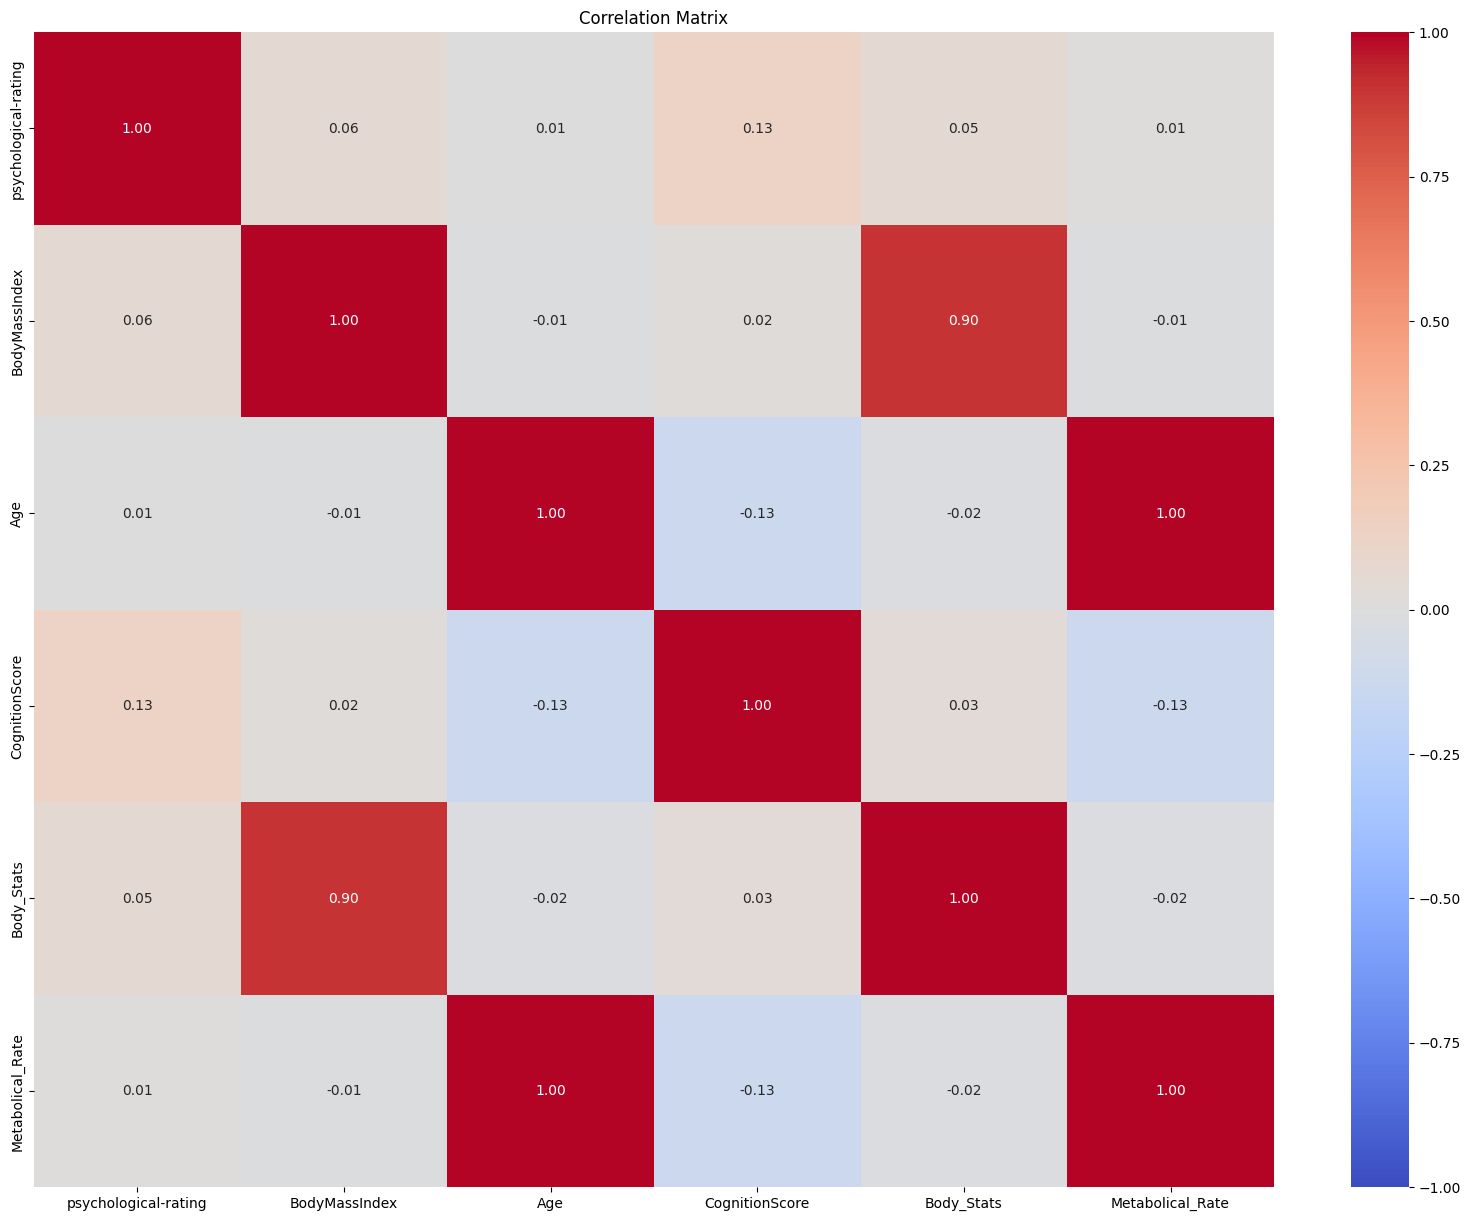

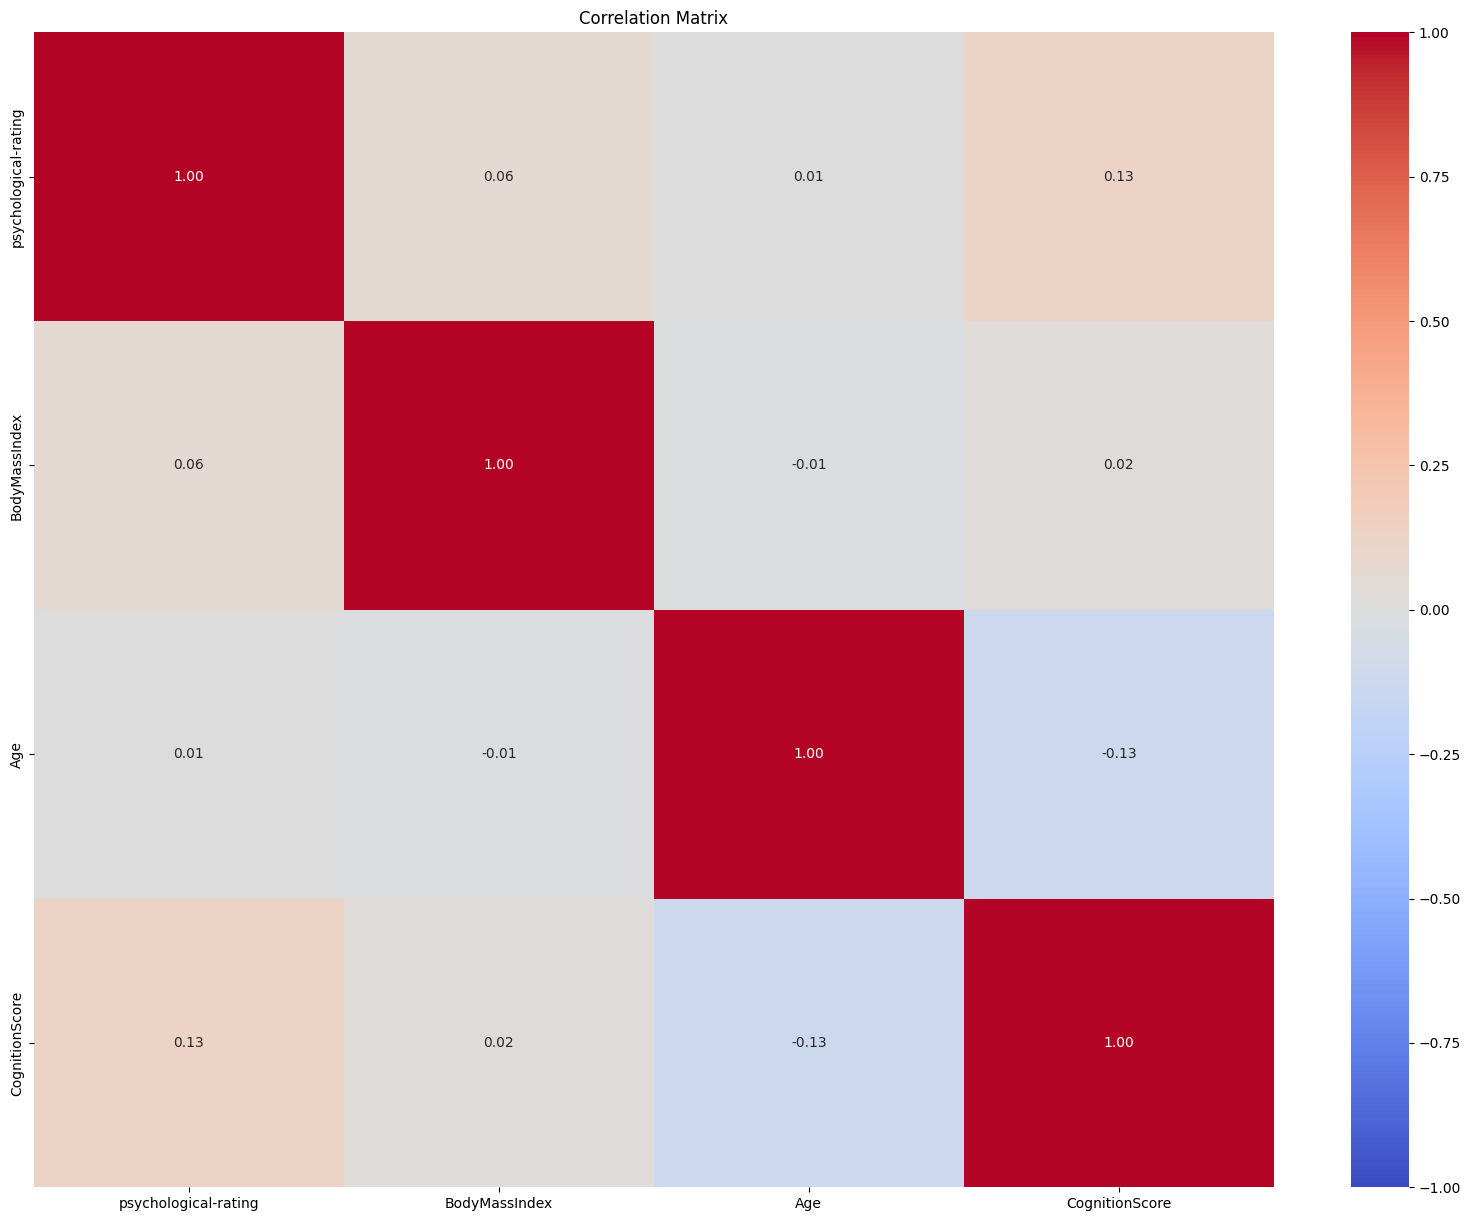

In [38]:
corr_mat = diabet_full_data_replaced[diabet_numeric_attr].corr(method = 'pearson')
plot_corr_matrix(corr_mat)
for attr1 in diabet_numeric_attr:
    for attr2 in diabet_numeric_attr:
        if attr1 == attr2:
            continue
        if corr_mat[attr1][attr2] > 0.6:
            diabet_numeric_attr.remove(attr2)
corr_mat = diabet_full_data_replaced[diabet_numeric_attr].corr(method = 'pearson')
plot_corr_matrix(corr_mat)

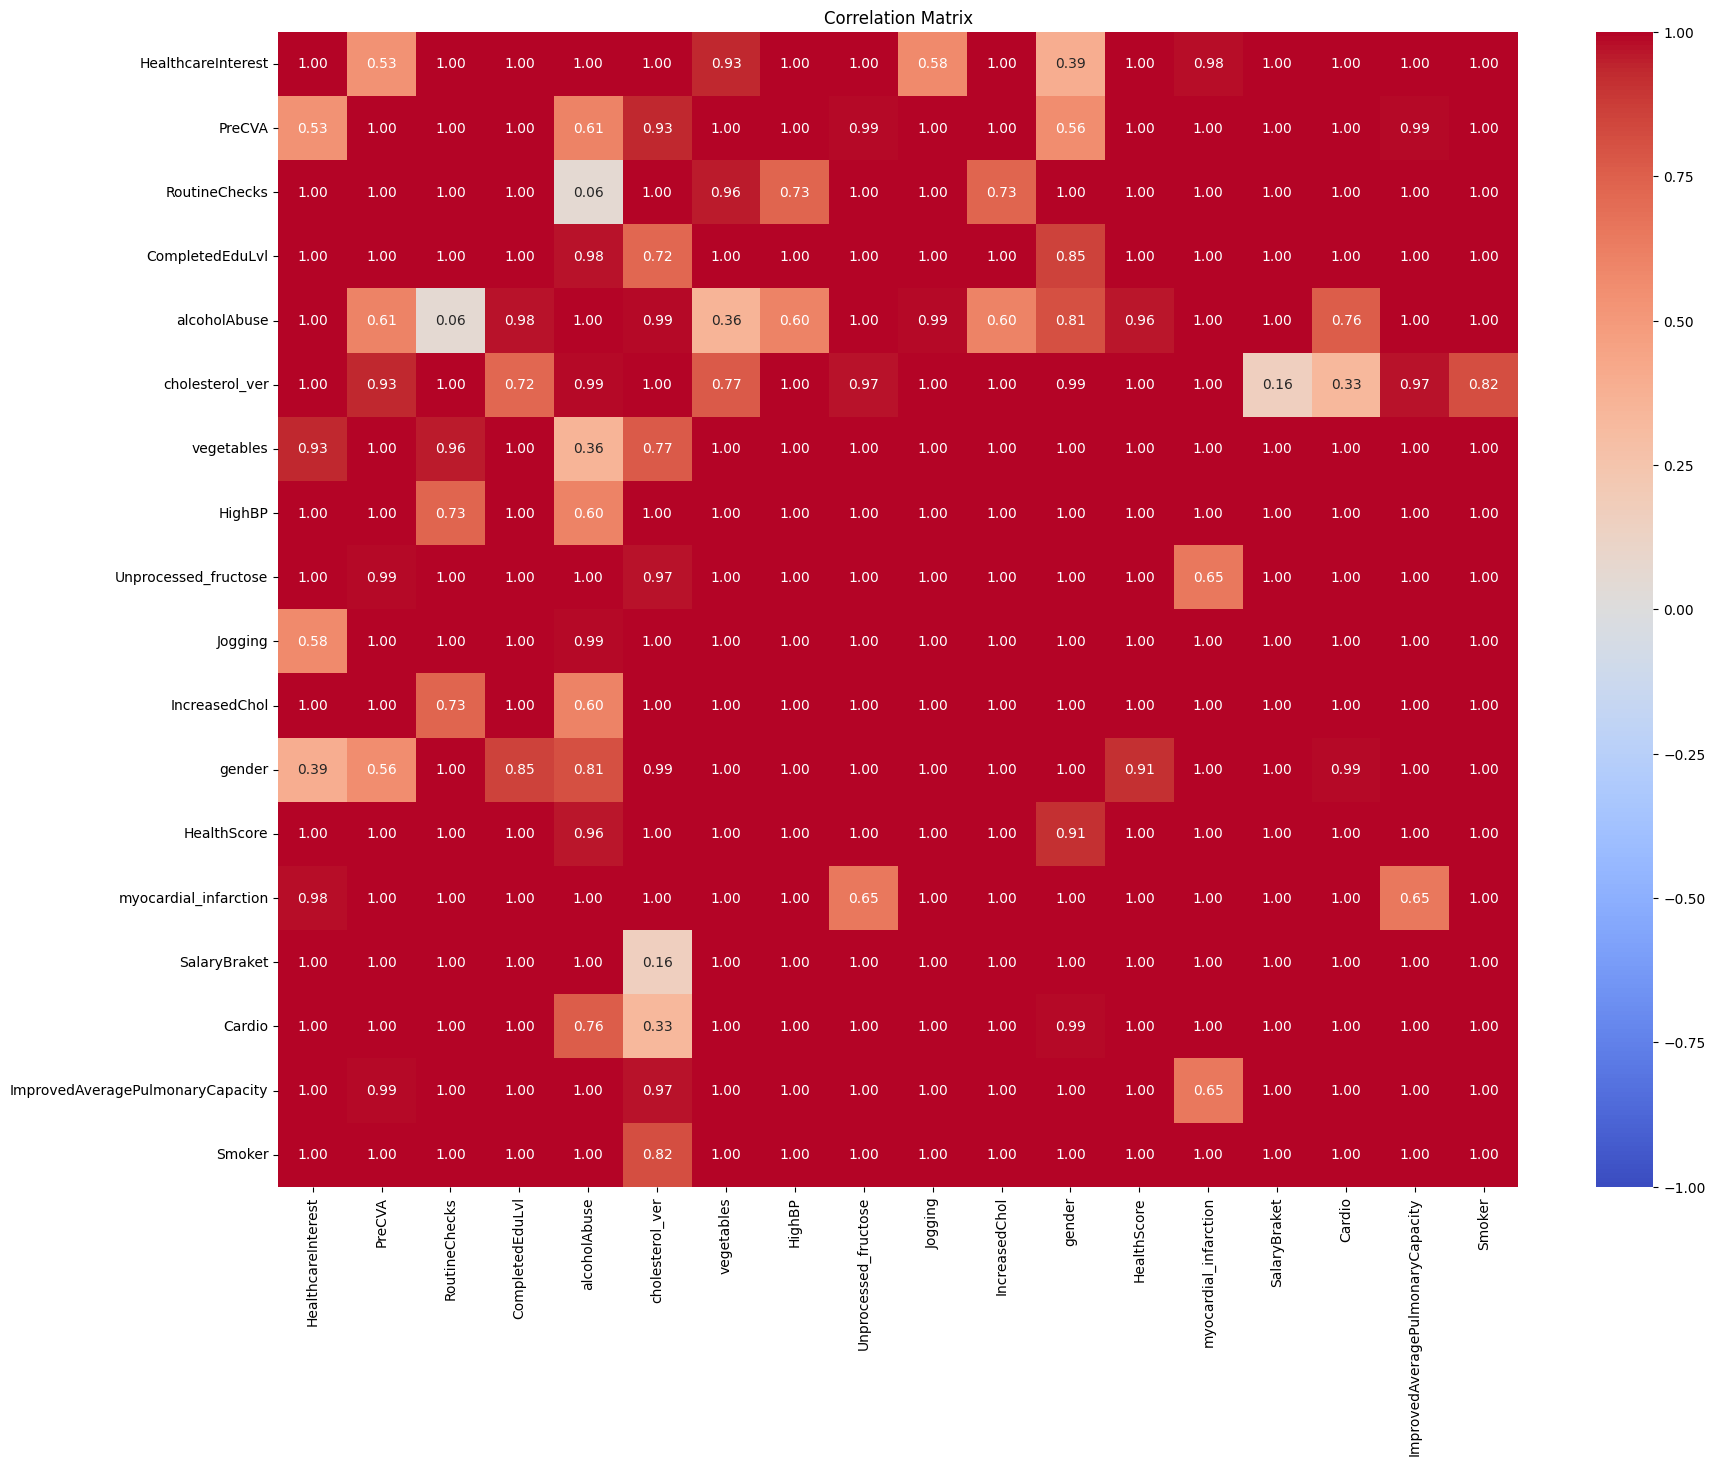

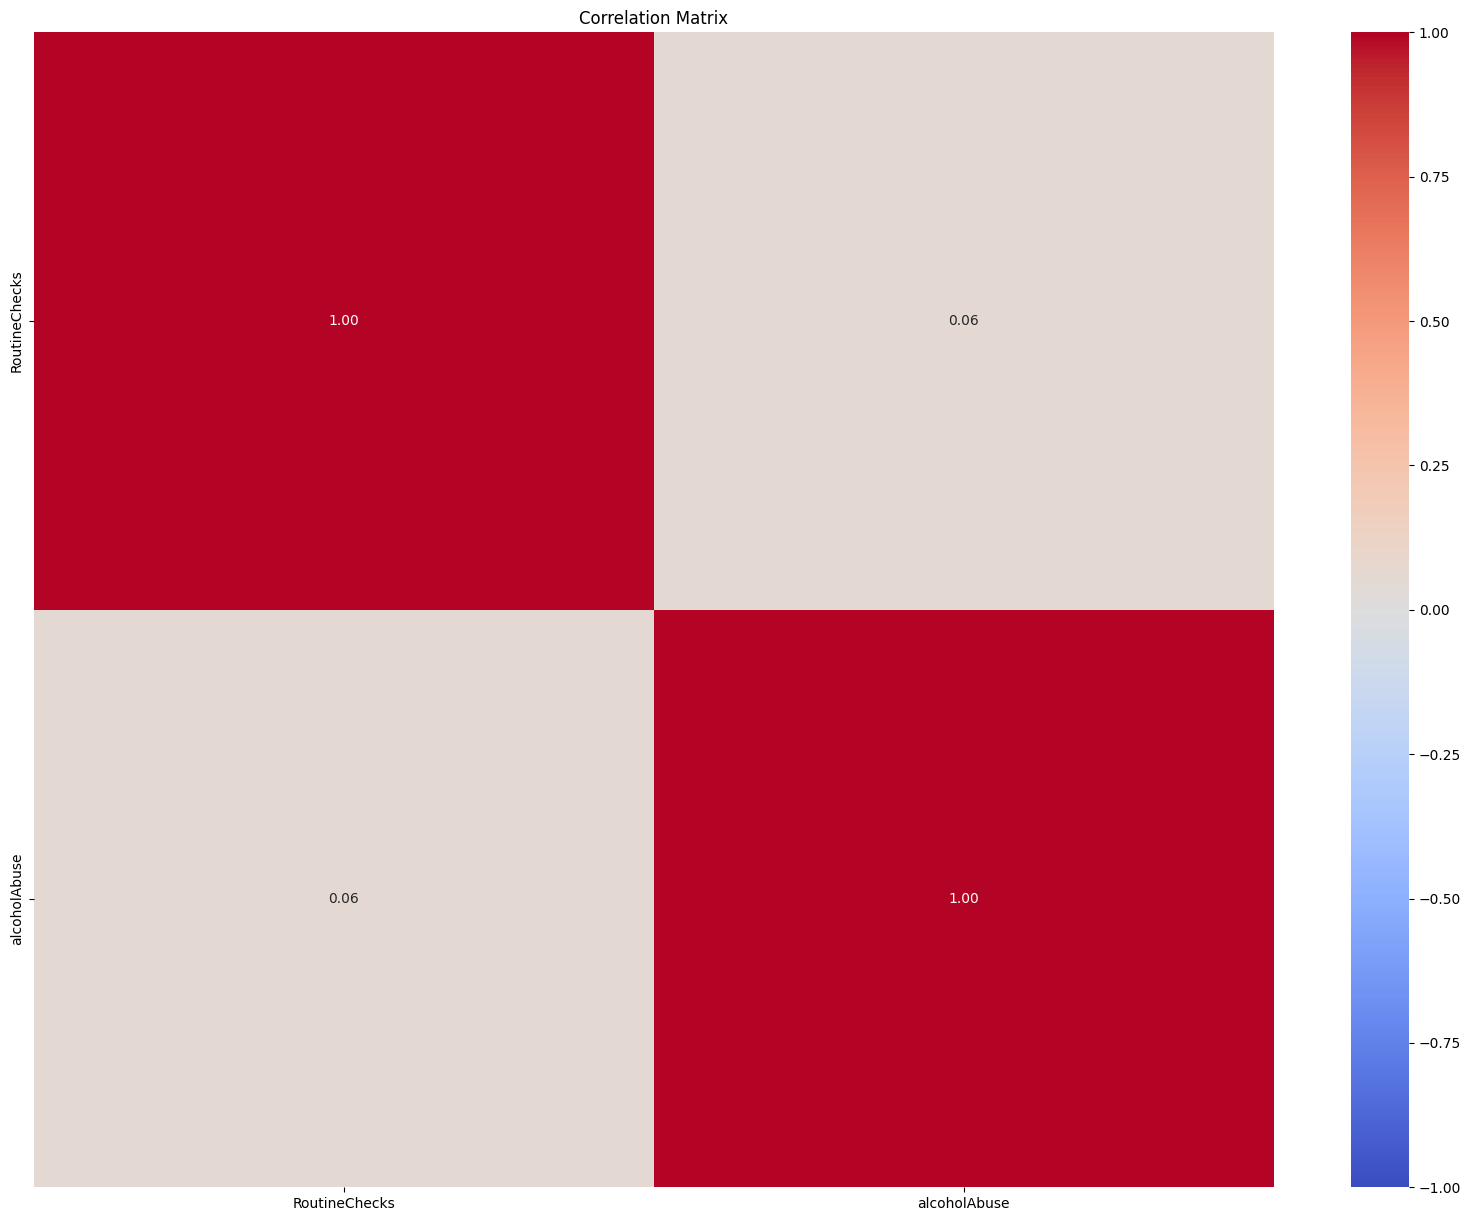

In [39]:
corr_mat_diabetes_chi2 = pd.DataFrame(index=diabet_ordinal_discrete_attr, columns=diabet_ordinal_discrete_attr)
for attr1 in diabet_ordinal_discrete_attr:
    for attr2 in diabet_ordinal_discrete_attr:
        if attr1 == attr2:
            corr_mat_diabetes_chi2.loc[attr1, attr2] = 1
            continue
        corr_mat_diabetes_chi2.loc[attr1, attr2] = float(chi2_test_of_independence(diabet_full_data_replaced, attr1, attr2))
corr_mat_diabetes_chi2 = corr_mat_diabetes_chi2.astype(float)
plot_corr_matrix(corr_mat_diabetes_chi2)
diabet_ordinal_discrete_attr_copy = diabet_ordinal_discrete_attr.copy()
diabet_ordinal_discrete_attr_copy.remove('HighBP')
diabet_ordinal_discrete_attr_copy.remove('Jogging')
diabet_ordinal_discrete_attr_copy.remove('PreCVA')
diabet_ordinal_discrete_attr_copy.remove('gender')
diabet_ordinal_discrete_attr_copy.remove('myocardial_infarction')
diabet_ordinal_discrete_attr_copy.remove('Smoker')
diabet_ordinal_discrete_attr_copy.remove('ImprovedAveragePulmonaryCapacity')
diabet_ordinal_discrete_attr_copy.remove('HealthScore')
diabet_ordinal_discrete_attr_copy.remove('CompletedEduLvl')
diabet_ordinal_discrete_attr_copy.remove('vegetables')
diabet_ordinal_discrete_attr_copy.remove('Unprocessed_fructose')
diabet_ordinal_discrete_attr_copy.remove('HealthcareInterest')
diabet_ordinal_discrete_attr_copy.remove('SalaryBraket')
diabet_ordinal_discrete_attr_copy.remove('IncreasedChol')
diabet_ordinal_discrete_attr_copy.remove('cholesterol_ver')
diabet_ordinal_discrete_attr_copy.remove('Cardio')
corr_mat_diabetes_chi2 = pd.DataFrame(index=diabet_ordinal_discrete_attr_copy, columns=diabet_ordinal_discrete_attr_copy)
for attr1 in diabet_ordinal_discrete_attr_copy:
    for attr2 in diabet_ordinal_discrete_attr_copy:
        if attr1 == attr2:
            corr_mat_diabetes_chi2.loc[attr1, attr2] = 1
            continue
        corr_mat_diabetes_chi2.loc[attr1, attr2] = float(chi2_test_of_independence(diabet_full_data_replaced, attr1, attr2))
corr_mat_diabetes_chi2 = corr_mat_diabetes_chi2.astype(float)
plot_corr_matrix(corr_mat_diabetes_chi2)
diabet_ordinal_discrete_attr = diabet_ordinal_discrete_attr_copy.copy()

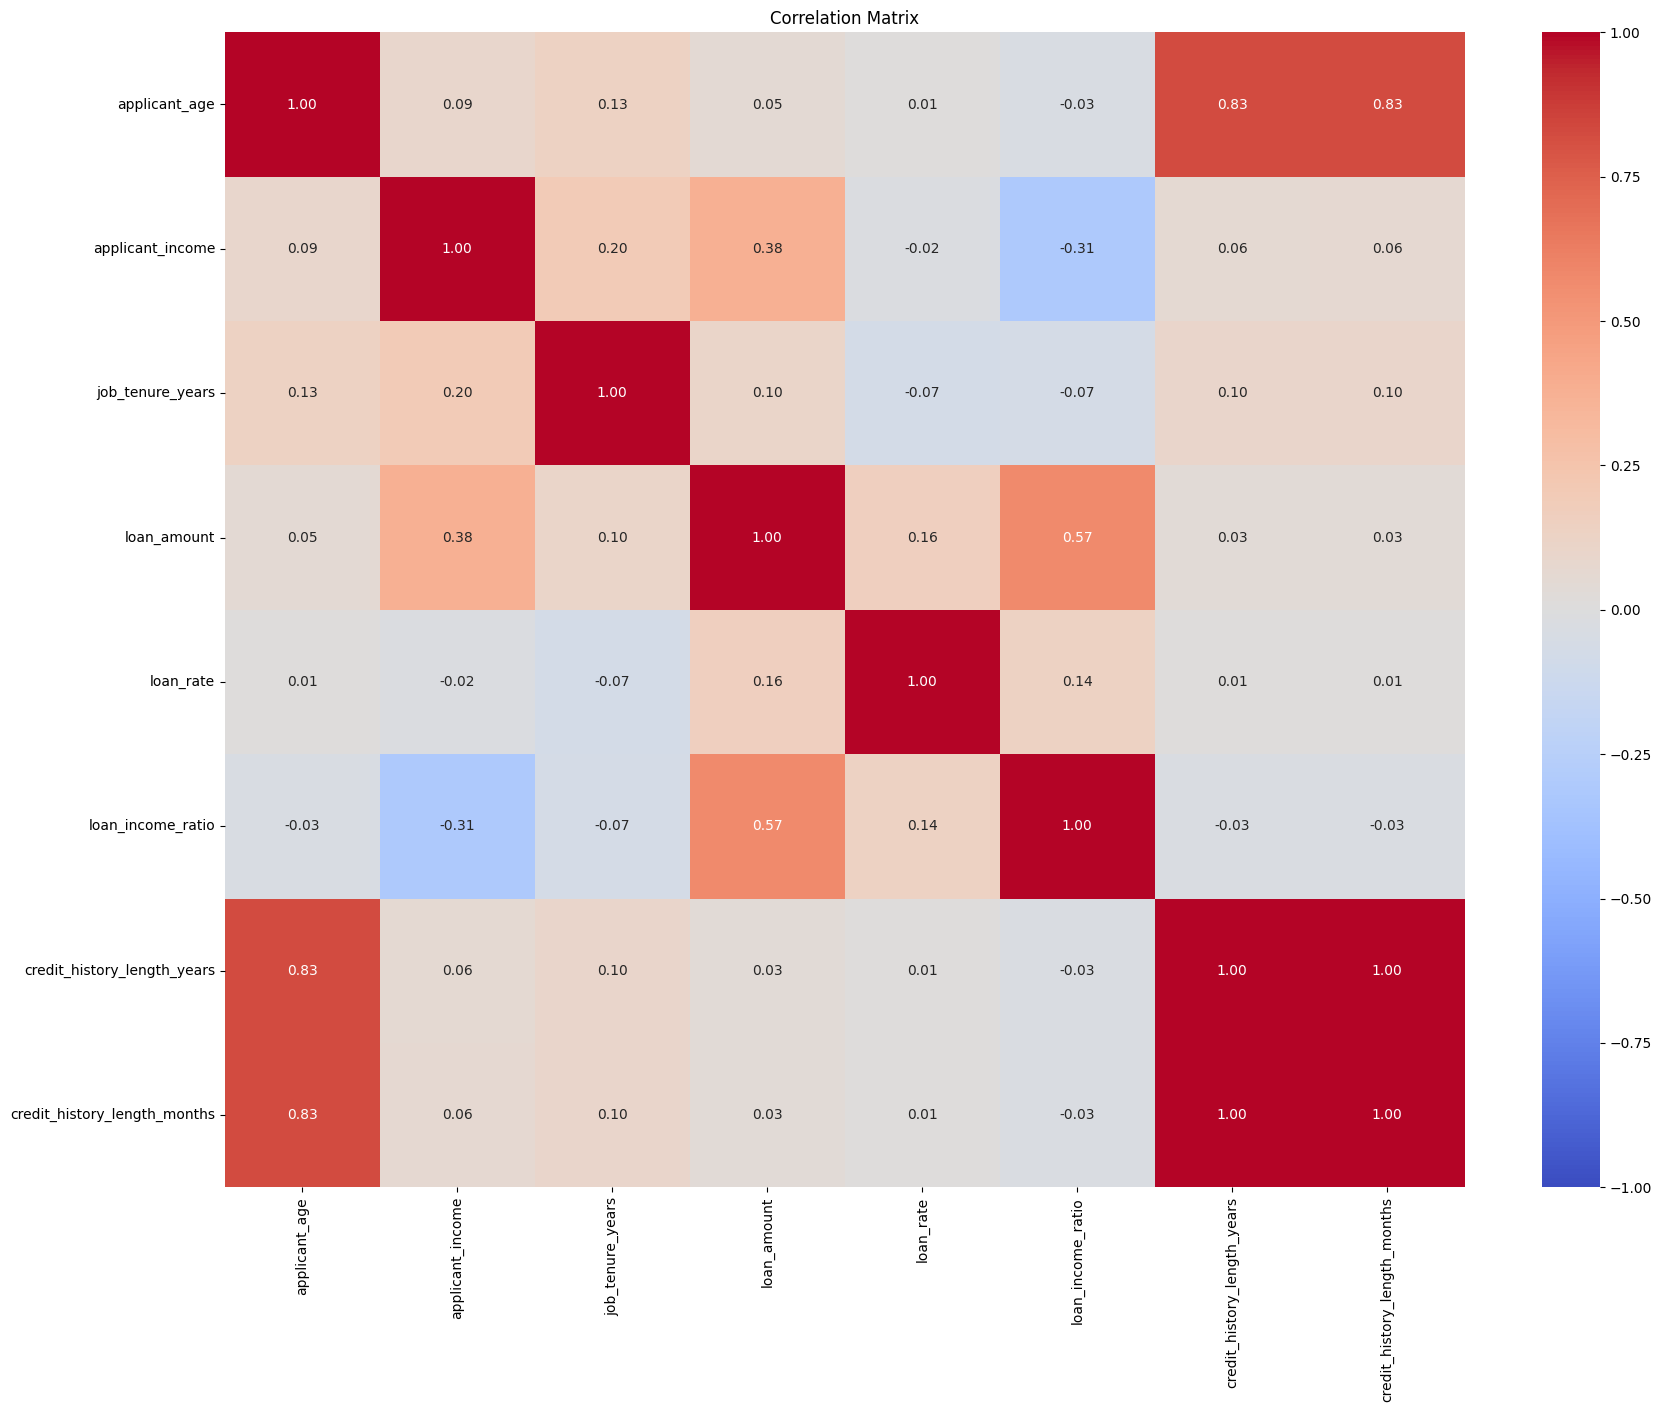

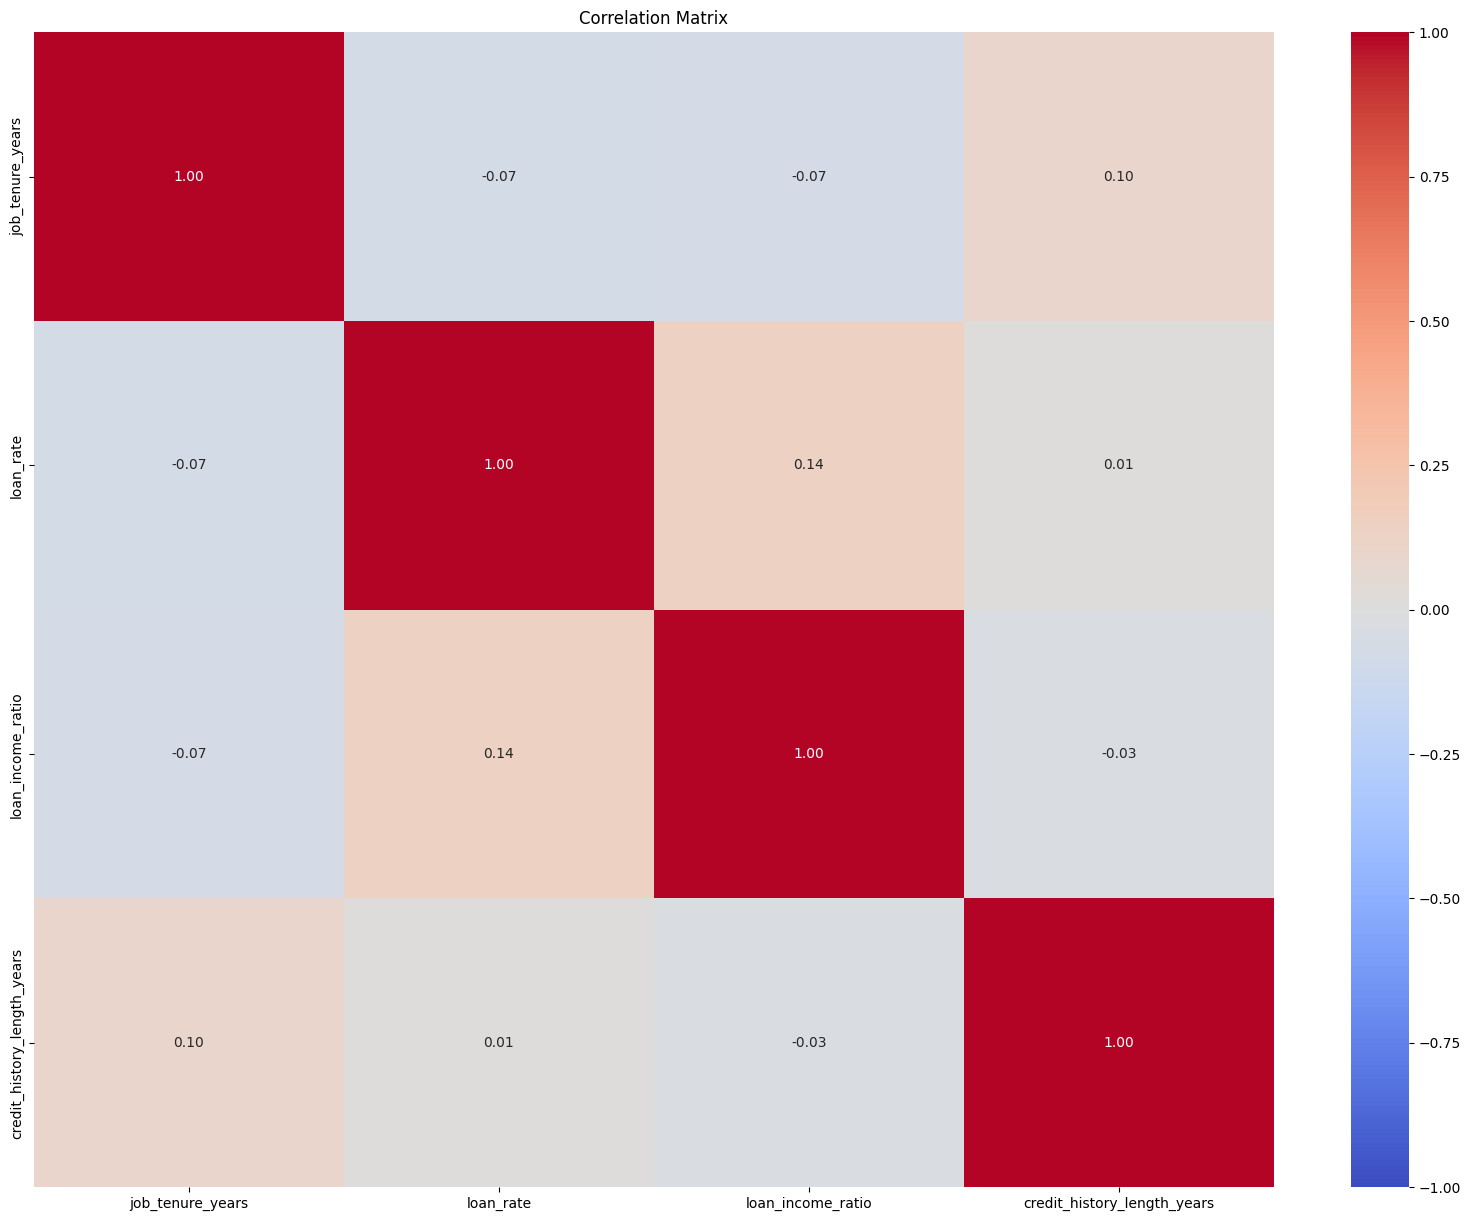

In [40]:
corr_credit_risk = credit_risk_full_data_replaced[credit_risk_numeric_attr].corr(method = 'pearson')
plot_corr_matrix(corr_credit_risk)
credit_risk_num_attr_copy = credit_risk_numeric_attr.copy()
credit_risk_num_attr_copy.remove('credit_history_length_months')
credit_risk_num_attr_copy.remove('applicant_age')
credit_risk_num_attr_copy.remove('applicant_income')
credit_risk_num_attr_copy.remove('loan_amount')
corr_credit_risk = credit_risk_full_data_replaced[credit_risk_num_attr_copy].corr(method = 'pearson')
plot_corr_matrix(corr_credit_risk)
credit_risk_num_attr = credit_risk_num_attr_copy.copy()

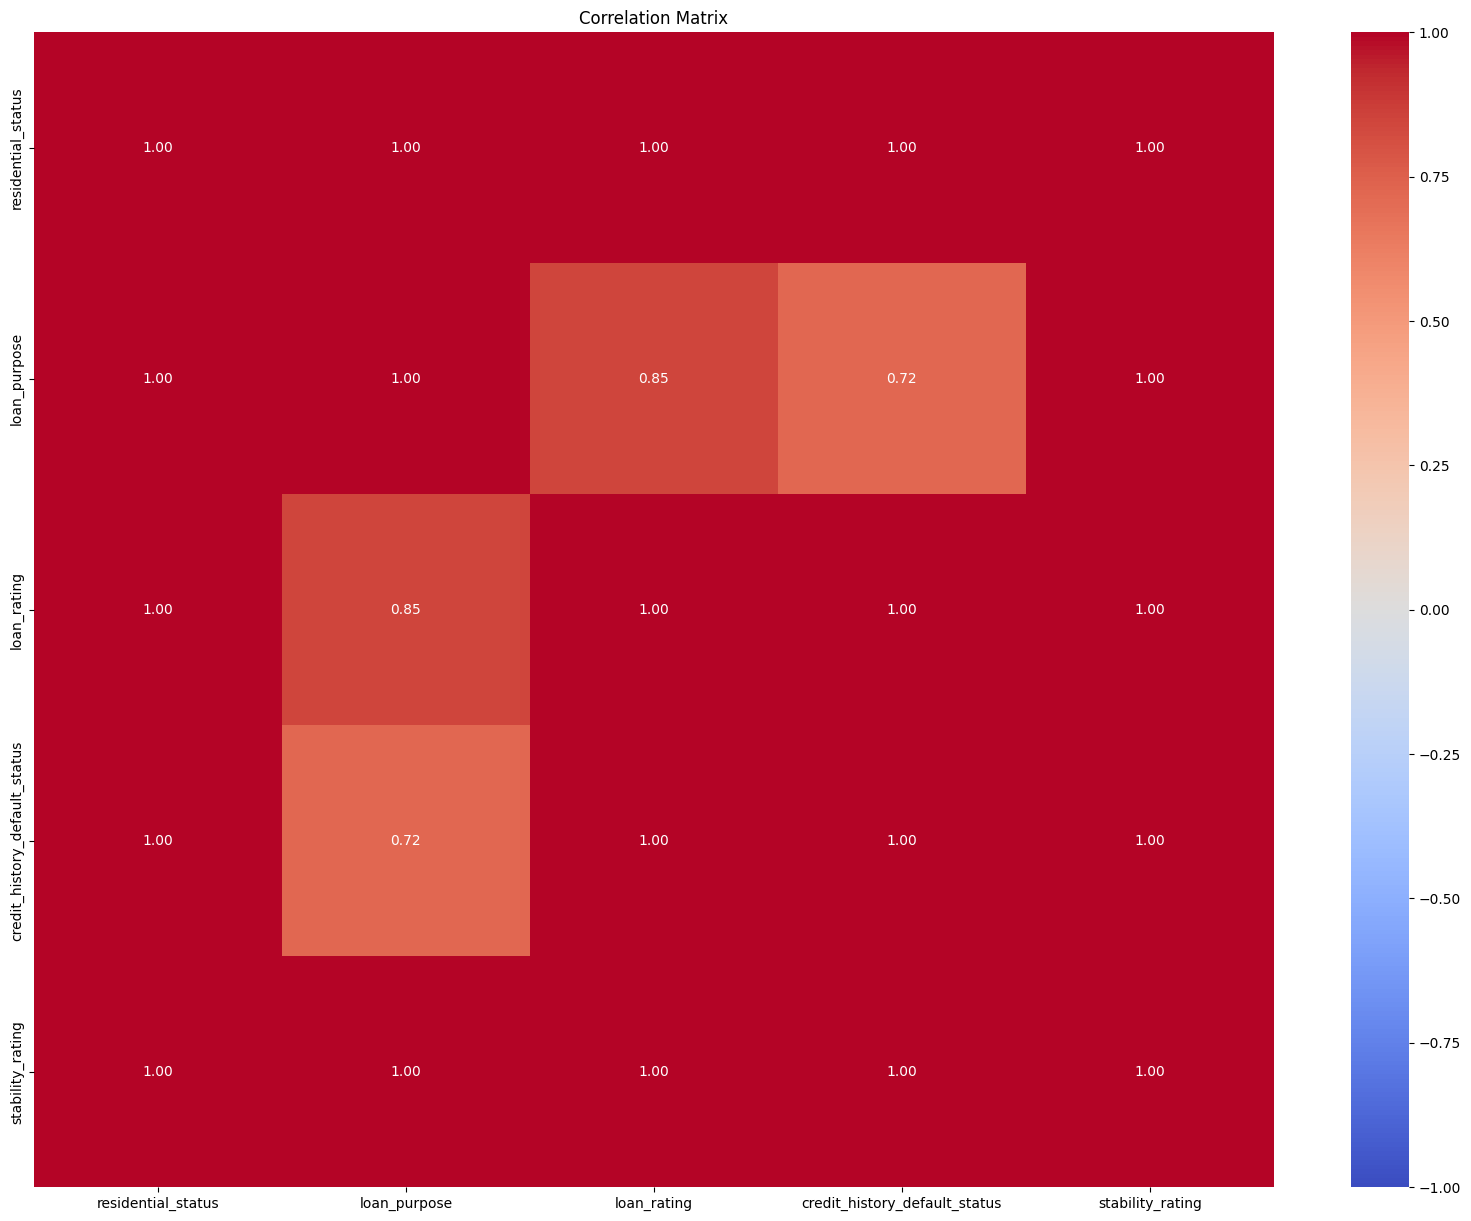

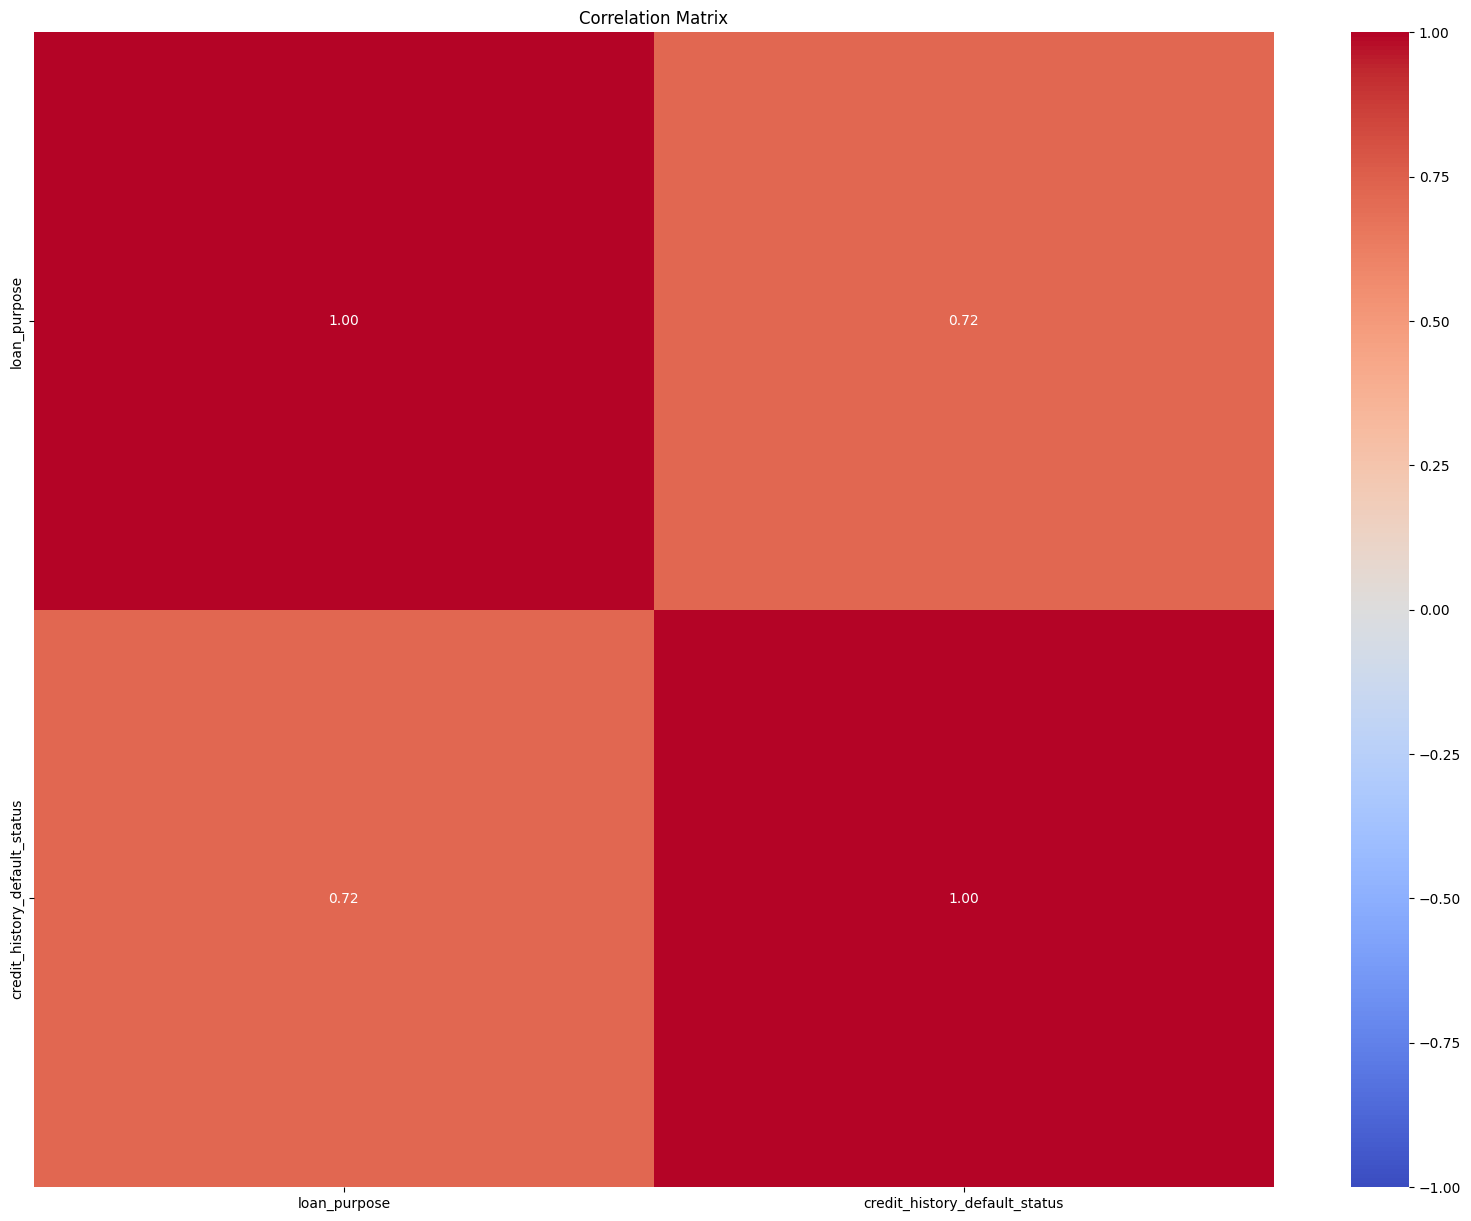

In [41]:
corr_credit_risk_chi2 = pd.DataFrame(index=credit_risk_discrete_ordinal_attr, columns=credit_risk_discrete_ordinal_attr)
for attr1 in credit_risk_discrete_ordinal_attr:
    for attr2 in credit_risk_discrete_ordinal_attr:
        if attr1 == attr2:
            corr_credit_risk_chi2.loc[attr1, attr2] = 1
            continue
        corr_credit_risk_chi2.loc[attr1, attr2] = float(chi2_test_of_independence(credit_risk_full_data_replaced, attr1, attr2))
corr_credit_risk_chi2 = corr_credit_risk_chi2.astype(float)
plot_corr_matrix(corr_credit_risk_chi2)
credit_risk_discrete_ordinal_attr_copy = credit_risk_discrete_ordinal_attr.copy()
credit_risk_discrete_ordinal_attr_copy.remove('stability_rating')
credit_risk_discrete_ordinal_attr_copy.remove('loan_rating')
credit_risk_discrete_ordinal_attr_copy.remove('residential_status')
corr_credit_risk_chi2 = pd.DataFrame(index=credit_risk_discrete_ordinal_attr_copy, columns=credit_risk_discrete_ordinal_attr_copy)
for attr1 in credit_risk_discrete_ordinal_attr_copy:
    for attr2 in credit_risk_discrete_ordinal_attr_copy:
        if attr1 == attr2:
            corr_credit_risk_chi2.loc[attr1, attr2] = 1
            continue
        corr_credit_risk_chi2.loc[attr1, attr2] = float(chi2_test_of_independence(credit_risk_full_data_replaced, attr1, attr2))
corr_credit_risk_chi2 = corr_credit_risk_chi2.astype(float)
plot_corr_matrix(corr_credit_risk_chi2)
credit_risk_distrete_ordinal_attr = credit_risk_discrete_ordinal_attr_copy.copy()

3.2.4. Standardizarea datelor

In [72]:
def standardise(dataset, attributes):
    scaler = StandardScaler()
    dataset[attributes] = scaler.fit_transform(dataset[attributes])
    return dataset[attributes]
    
    

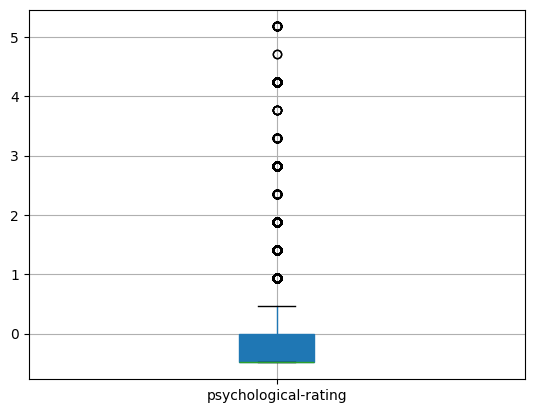

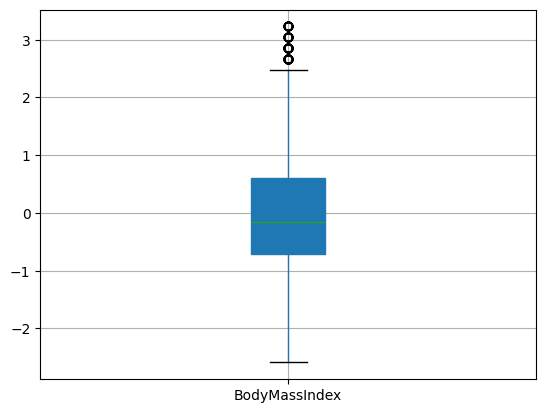

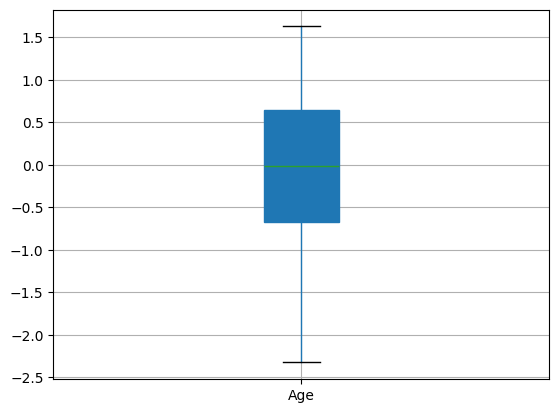

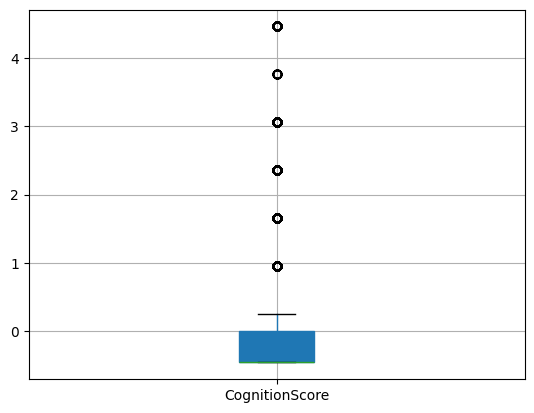

In [103]:
diabet_full_data_standardised = diabet_full_data_replaced.copy()
diabet_full_data_standardised[diabet_numeric_attr] = standardise(diabet_full_data_standardised, diabet_numeric_attr)
diabet_train_data_standardised = diabet_train_data_replaced.copy()
diabet_train_data_standardised[diabet_numeric_attr] = standardise(diabet_train_data_standardised, diabet_numeric_attr)
diabet_test_data_standardised = diabet_test_data_replaced.copy()
diabet_test_data_standardised[diabet_numeric_attr] = standardise(diabet_test_data_standardised, diabet_numeric_attr)
for attr in diabet_numeric_attr:
    diabet_full_data_standardised.boxplot(column=attr, patch_artist=True)
    plt.show()




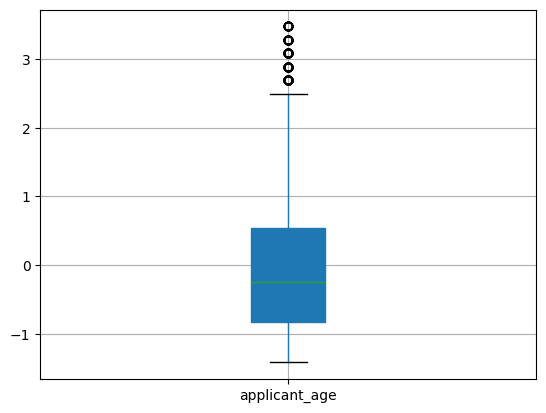

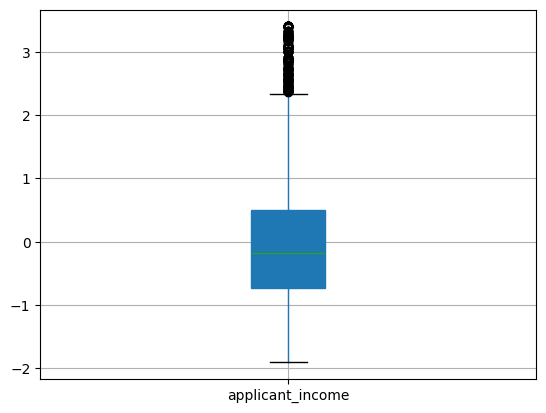

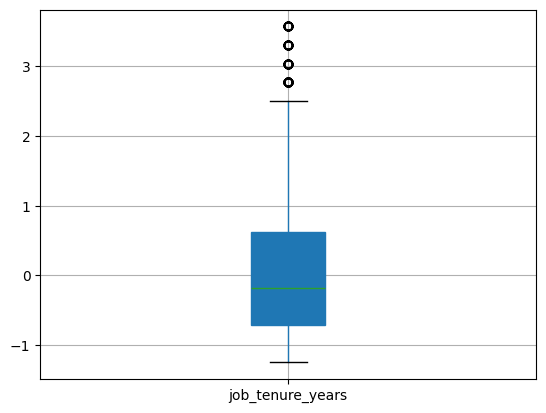

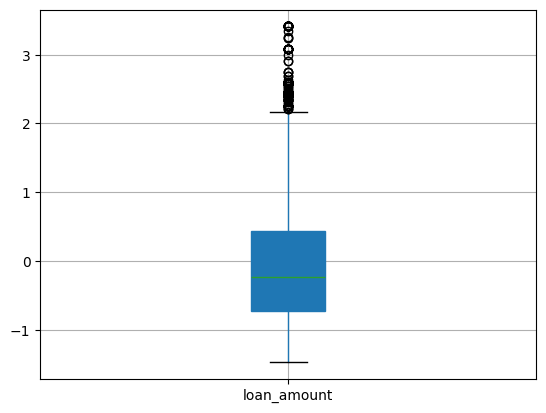

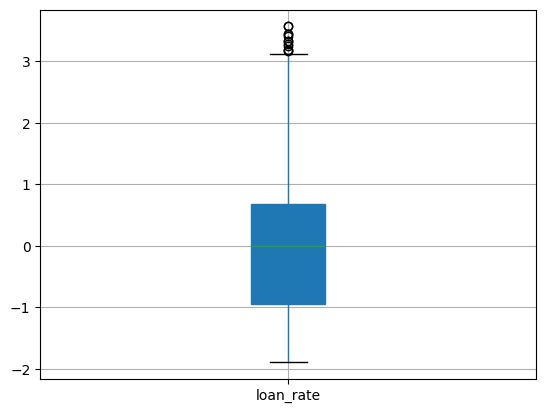

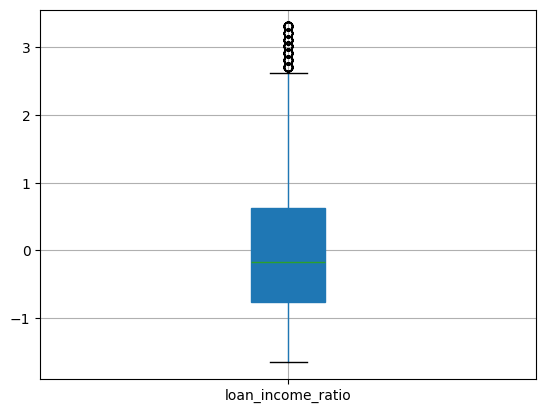

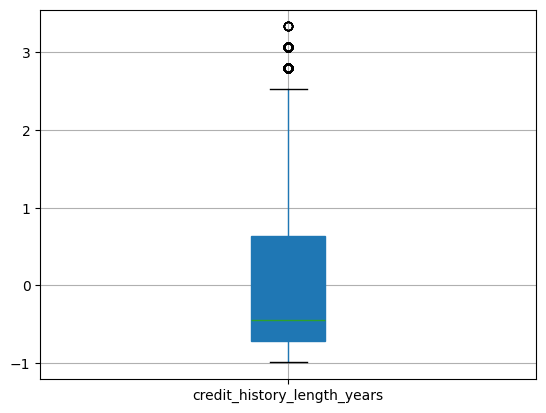

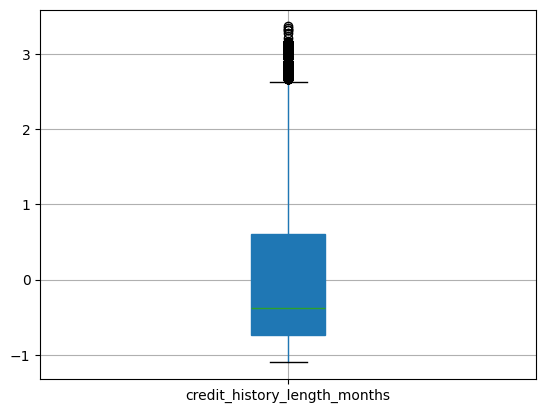

In [368]:
credit_risk_full_data_standardised = credit_risk_full_data_replaced.copy()
credit_risk_full_data_standardised[credit_risk_numeric_attr] = standardise(credit_risk_full_data_standardised, credit_risk_numeric_attr)
credit_risk_train_data_standardised = credit_risk_train_data_replaced.copy()
credit_risk_train_data_standardised[credit_risk_numeric_attr] = standardise(credit_risk_train_data_standardised, credit_risk_numeric_attr)
credit_risk_test_data_standardised = credit_risk_test_data_replaced.copy()
credit_risk_test_data_standardised[credit_risk_numeric_attr] = standardise(credit_risk_test_data_standardised, credit_risk_numeric_attr)
for attr in credit_risk_numeric_attr:
    credit_risk_full_data_standardised.boxplot(column=attr, patch_artist=True)
    plt.show()

3.3. Utilizarea algoritmilor de invatare automata
3.3.1. Random Forest
Scikit-learn

In [369]:
#solve random forest for diabet using scikit-learn library
def solve_dataset(train, test, numeric_attr, categoric_attr, attr):
    X_train = train[numeric_attr + categoric_attr]
    y_train = train[attr]
    X_test = test[numeric_attr + categoric_attr]
    y_test = test[attr]
    classifier = RandomForestClassifier(n_estimators=100, min_samples_split=2, random_state=0, min_samples_leaf=1, max_features='sqrt', max_depth=100, bootstrap=True, criterion='gini')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return f1, precision, recall, accuracy, cm

def encode_dataset_params(dataset, categoric_attr):
    encoder = LabelEncoder()
    for attr in categoric_attr:
        dataset[attr] = encoder.fit_transform(dataset[attr])
    return dataset[categoric_attr]


In [370]:
diabet_train_data_encoded = diabet_train_data_standardised.copy()
diabet_train_data_encoded[diabet_ordinal_discrete_attr] = encode_dataset_params(diabet_train_data_replaced, diabet_ordinal_discrete_attr)
diabet_test_data_encoded = diabet_test_data_standardised.copy()
diabet_test_data_encoded[diabet_ordinal_discrete_attr] = encode_dataset_params(diabet_test_data_replaced, diabet_ordinal_discrete_attr)
f1, precision, recall, accuracy, cm = solve_dataset(diabet_train_data_encoded, diabet_test_data_encoded, diabet_numeric_attr, diabet_ordinal_discrete_attr, 'Diabetes')
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('Confusion matrix:')
print(cm)

F1 score: 0.6491232472128357
Precision: 0.6470224320947883
Recall: 0.717
Accuracy: 0.717
Confusion matrix:
[[1372    3   71]
 [  50    0    4]
 [ 436    2   62]]


In [371]:
credit_risk_train_data_encoded = credit_risk_train_data_standardised.copy()
credit_risk_train_data_encoded[credit_risk_discrete_ordinal_attr] = encode_dataset_params(credit_risk_train_data_standardised, credit_risk_discrete_ordinal_attr)
credit_risk_test_data_encoded = credit_risk_test_data_standardised.copy()
credit_risk_test_data_encoded[credit_risk_discrete_ordinal_attr] = encode_dataset_params(credit_risk_test_data_standardised, credit_risk_discrete_ordinal_attr)
f1, precision, recall, accuracy, cm = solve_dataset(credit_risk_train_data_encoded, credit_risk_test_data_encoded, credit_risk_numeric_attr, credit_risk_discrete_ordinal_attr, 'loan_approval_status')
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('Confusion matrix:')
print(cm)

F1 score: 0.9033066666666666
Precision: 0.9086713814024828
Recall: 0.909
Accuracy: 0.909
Confusion matrix:
[[1534   30]
 [ 152  284]]


Implementare Random Forest Manual

In [157]:
def transform_numerical_attributes(dataset, attributes):
    for attr in attributes:
        dataset[attr] = pd.cut(dataset[attr], bins=5, labels=False, duplicates='drop')
    return dataset[attributes]

In [164]:
diabet_full_data_transformed = diabet_full_data_standardised.copy()
diabet_full_data_transformed[diabet_numeric_attr] = transform_numerical_attributes(diabet_full_data_transformed, diabet_numeric_attr)
diabet_train_data_transformed = diabet_train_data_standardised.copy()
diabet_train_data_transformed[diabet_numeric_attr] = transform_numerical_attributes(diabet_train_data_transformed, diabet_numeric_attr)
diabet_test_data_transformed = diabet_test_data_standardised.copy()
diabet_test_data_transformed[diabet_numeric_attr] = transform_numerical_attributes(diabet_test_data_transformed, diabet_numeric_attr)
credit_risk_full_data_transformed = credit_risk_full_data_standardised.copy()
credit_risk_full_data_transformed[credit_risk_numeric_attr] = transform_numerical_attributes(credit_risk_full_data_transformed, credit_risk_numeric_attr)
credit_risk_train_data_transformed = credit_risk_train_data_standardised.copy()
credit_risk_train_data_transformed[credit_risk_numeric_attr] = transform_numerical_attributes(credit_risk_train_data_transformed, credit_risk_numeric_attr)
credit_risk_test_data_transformed = credit_risk_test_data_standardised.copy()
credit_risk_test_data_transformed[credit_risk_numeric_attr] = transform_numerical_attributes(credit_risk_test_data_transformed, credit_risk_numeric_attr)

In [181]:
class DecisionTreeNode:
    """
    Un nod din arborele de decizie. Acesta poate fi un nod intermediar sau un nod frunză.
    """
    
    def __init__(self, 
                 feature: Optional[str] = None, 
                 children: Optional[Dict[str, 'DecisionTreeNode']] = None, 
                 label: Optional[str] = None):
        """
        Constructor pentru un nod din arborele de decizie
        
        Args:
            feature (str, optional): 
                Numele atributului după care se face împărțirea. Defaults to None.
            children (Dict[str, DecisionTreeNode], optional): 
                Un dictionar ce conține subarborii nodului curent. Defaults to None.
            label (str, optional): 
                Clasa nodului frunză. Defaults to None.
        """
        self.split_feature = feature  # Numele atributului după care se face împărțirea (None pentru nodurile frunză)
        self.children = children if (children is not None and feature is not None) else {}
        self.label = label    # Clasa nodului frunză (None pentru nodurile intermediare)
        self.depth = 1        # Adâncimea nodului în arbore (se calculează în timpul construcției arborelui)
        self.score = 0        # Scorul nodului (se calculează în timpul construcției arborelui)
        self.num_samples = 0  # Numărul de exemple din setul de date care ajung în nodul curent
    
    def get_tree_graph(self,
                       graph: Digraph = None) -> Digraph:
        """
        Construiește reprezentarea grafică a arborelui de decizie folosind biblioteca Graphviz
    
        Args:
            graph (Digraph, optional): 
                Obiectul Digraph în care se construiește reprezentarea arborelui. Defaults to None.
        """
        if graph is None:
            graph = Digraph()
            graph.attr('node', shape='box')
    
        if self.split_feature is None:
            # Nod frunză
            graph.node(f"{self}", f"Label: {self.label}\n"
                                  f"Score: {self.score:.3f}\n"
                                  f"Samples: {self.num_samples}", 
                       fillcolor='darkolivegreen2', style='filled')
        else:
            # Nod intermediar
            graph.node(f"{self}", f"Split: {self.split_feature}?\n"
                                  f"Score: {self.score:.3f}\n"
                                  f"Samples: {self.num_samples}", fillcolor='lightblue', style='filled')
            
            for value, child in self.children.items():
                child.get_tree_graph(graph)
                graph.edge(f"{self}", f"{child}", label=f"{value}")
    
        return graph
    
    def display(self):
        """
        Afișează arborele de decizie folosind biblioteca Graphviz. Arborele va fi afișat ca output al celulei.
        """
        graph = self.get_tree_graph()
        idisplay(Source(graph.source))

In [188]:

class DecisionTree:
    """
    Clasa care implementează un arbore de decizie. 
    Arborele poate fi construit folosind algoritmul ID3 sau Random Tree, în funcție de strategia de împărțire specificată.
    """
    def __init__(self,
                 split_strategy: str = 'random',
                 max_depth: int = np.inf,
                 min_samples_per_node: int = 1):
        """
        Constructor pentru un arbore de decizie
        
        Args:
            split_strategy (string, optional): 
                Strategia folosită pentru alegerea împărțirii într-un nod. Aceasta poate fi:
                - 'id3' - alege împărțirea care maximizează câștigul informațional (folosind algoritmul ID3)
                - 'random' - alege aleator o împărțire
                Defaults to 'random'.
            max_depth (int, optional): 
                Adâncimea maximă a arborelui. Defaults to infinity.
            min_samples_per_node (int, optional): 
                Numărul minim de exemple dintr-un nod pentru a face o împărțire. 
                Defaults to 1.
        """
        self._root: DecisionTreeNode | None = None # Rădăcina arborelui
        self._split_strategy: str = split_strategy
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        
        
    @staticmethod
    def most_frequent_class(y: pd.Series) -> str:
        return y.mode().values[0]
    @staticmethod
    def compute_entropy(y: pd.Series) -> float:
        freq = y.value_counts(sort=False)
        entropy = 0
        for val in freq:
            entropy += -(val/len(y)) * np.log2(val/len(y))
        return entropy
    @staticmethod
    def compute_information_gain(X: pd.DataFrame, y: pd.Series, feature: str) -> float:
        initial_entropy = DecisionTree.compute_entropy(y)
        final_entropy = 0
        for value in X[feature].unique():
            final_entropy += (len(X[X[feature] == value]) / len(X)) * DecisionTree.compute_entropy(y[X[feature] == value])
        return initial_entropy - final_entropy
    
    def _select_random_split_feature(self, X: pd.DataFrame, y: pd.Series, attribute_list: list[str]) -> str:
        return np.random.choice(attribute_list)
    
    
    def _select_best_split_feature(self, X: pd.DataFrame, y: pd.Series, attribute_list: list[str]) -> str:
        max = 0
        best_attribute = attribute_list[0]
        for attribute in attribute_list:
            gain = DecisionTree.compute_information_gain(X, y, attribute)
            if gain > max:
                max = gain
                best_attribute = attribute
        return best_attribute
    
    def _generate_tree(self,
                       parent_node: DecisionTreeNode | None,
                       X: pd.DataFrame,
                       y: pd.Series,
                       feature_list: list[str],
                       select_feature_func: Callable[[pd.DataFrame, pd.Series, list[str]], str]) -> DecisionTreeNode:

        # Se face o copie a listei de atribute pentru a nu modifica lista inițială
        feature_list = deepcopy(feature_list)
        
        # Se creează un nou nod pentru arbore
        node = DecisionTreeNode()
        node.depth = parent_node.depth + 1 if parent_node is not None else 0
        node.score = DecisionTree.compute_entropy(y)  
        node.num_samples = len(y)
        node.label = DecisionTree.most_frequent_class(y)
        
        if y.nunique() == 1 or node.depth >= self._max_depth or len(y) < self._min_samples_per_node or len(feature_list) == 0:
            return node
        split_feature = select_feature_func(X, y, feature_list)
        feature_list.remove(split_feature)
        node.split_feature = split_feature
        for value in X[split_feature].unique():
            node.children[value] = self._generate_tree(node, X[X[split_feature] == value], y[X[split_feature] == value], feature_list, select_feature_func)
        # Pentru fiecare valoare `value` a atributului `split_feature`
        # Se selectează submulțimea de exemple care au valoarea `value` pentru atributul `split_feature`
        # Se construiește subarborele pentru submulțimea de exemple
        # Se adaugă subarborele la nodul curent
        
        return node
        
    def fit(self, X: pd.DataFrame, y: pd.Series):
        """
        Construiește arborele de decizie pe baza setului de date. 
        Va folosi strategia de împărțire specificată în constructor.
        
        Args:
            X (pd.DataFrame): 
                Setul de date (atributele)
            y (pd.Series): 
                Clasele corespunzătoare fiecărui exemplu din setul de date
        """
        # Selectează funcția de împărțire a nodurilor
        if self._split_strategy == 'random':
            select_feature_func = self._select_random_split_feature
        elif self._split_strategy == 'id3':
            select_feature_func = self._select_best_split_feature
        else:
            raise ValueError(f"Unknown split strategy {self._split_strategy}")
        
        self._root = self._generate_tree(parent_node=None,
                                         X=X,
                                         y=y,
                                         feature_list=X.columns.tolist(),
                                         select_feature_func=select_feature_func)
        
    def _predict_once(self, x: pd.Series) -> str:
        node = self._root
        
        while node.split_feature is not None:
            if node.split_feature in x and x[node.split_feature] in node.children:
                node = node.children[x[node.split_feature]]
            else:
                break
        return node.label
        
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        return np.array([self._predict_once(x) for _, x in X.iterrows()])
    
    def get_depth(self) -> int:
        def _get_depth(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return max([_get_depth(child) for child in node.children.values()], default=0) + 1
        
        return _get_depth(self._root)
    
    def get_number_of_nodes(self) -> int:
        def _get_number_of_nodes(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return sum([_get_number_of_nodes(child) for child in node.children.values()], 0) + 1
        
        return _get_number_of_nodes(self._root)
    
    def get_tree_graph(self) -> Digraph:
        return self._root.get_tree_graph()
    
    def display(self):
        return self._root.display()
class RandomForest:
    """
    Clasa care implementează un clasificator de tip pădure de arbori aleatori.
    """
    def __init__(self,
                 n_estimators: int = 100,
                 max_depth: int = 3,
                 min_samples_per_node: int = 1,
                 split_strategy: str = 'random',
                 subset_size_ratio: float = 0.5,
                 subset_feature_ratio: float = 0.75):
        """
        Constructor pentru un clasificator de tip pădure de arbori aleatori
        
        Args:
            n_estimators (int, optional): 
                Numărul de arbori din pădure. Defaults to 100.
            max_depth (int, optional): 
                Adâncimea maximă a fiecărui arbore. Defaults to 3.
            min_samples_per_node (int, optional): 
                Numărul minim de exemple dintr-un nod pentru a face o împărțire. 
                Defaults to 1.
            split_strategy (str, optional):
                Strategia folosită pentru alegerea împărțirii într-un nod. Aceasta poate fi:
                - 'id3' - alege împărțirea care maximizează câștigul informațional (folosind algoritmul ID3)
                - 'random' - alege aleator o împărțire
                Defaults to 'random'.
            subset_size_ratio (float, optional):
                Raportul de dimensiune al subsetului de date folosit pentru construirea fiecărui arbore comparativ cu
                dimensiunea setului de date inițial. Trebuie să fie un număr între 0 și 1.
                Defaults to 0.5.
            subset_feature_ratio (float, optional):
                Raportul de dimensiune al subsetului de atribute folosit pentru construirea fiecărui arbore comparativ cu
                dimensiunea setului de atribute inițial. Trebuie să fie un număr între 0 și 1.
                Defaults to 0.75.
        """
        assert 0 < subset_size_ratio <= 1, "subset_size_ratio must be between 0 and 1"
        assert 0 < subset_feature_ratio <= 1, "subset_feature_ratio must be between 0 and 1"
        
        self._trees: list[DecisionTree] = []
        self._n_estimators: int = n_estimators
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        self._split_strategy: str = split_strategy
        self._subset_size_ratio: float = subset_size_ratio
        self._subset_feature_ratio: float = subset_feature_ratio
        
    def fit(self, X: pd.DataFrame, y: pd.Series):
        """
        Construiește pădurea de arbori aleatori pe baza setului de date
        
        Args:
            X (pd.DataFrame): 
                Setul de date (atributele)
            y (pd.Series): 
                Clasele corespunzătoare fiecărui exemplu din setul de date
        """
        # TODO 8. Construiți pădurea de arbori aleatori
        # Pentru a construi pădurea de arbori aleatori se vor parcurge următorii pași pentru fiecare estimator:
        #   1. Se alege un subset aleator din setul de date de antrenare. 
        #      Subsetul va conține un număr de exemple egal cu 
        #      `subset_size_ratio` * numărul de exemple din setul de date
        #   2. Se construiește un arbore de decizie pe subsetul de date
        #   3. Se adaugă arborele la pădure
        # HINT:
        #   Pentru a alege un subset aleator din setul de date puteți folosi funcția np.random.choice() pentru a selecta
        #   indicii exemplelor care vor fi folosiți în construcția arborelui. Indicii vor fi extrași fără înlocuire. 
        #   Exemplu:
        #       indices = np.random.choice(X.shape[0], size=int(self._subset_size_ratio * X.shape[0]), replace=False)
        #       X_subset = X.iloc[indices]  # Selectează doar exemplele cu indicii aleși (atributele rămân aceleași)
        #       y_subset = y.iloc[indices]
        #   Funcția `np.random.choice()` va selecta indicii aleator din intervalul [0, X.shape[0]) și va returna un subset
        #   de dimensiune `int(self._subset_size_ratio * X.shape[0])` cu indicii selectați.
        #   Indicii vor fi un np.ndarray de forma [0, 1, 2, 3, 5, 9, ...].
        # HINT: 
        #   Pentru a extrage un subset de atribute puteți folosi următoarea expresie:
        #       X_subset = X[features]
        #   unde `features` este o listă cu numele atributelor pe care doriți să le folosiți
        for _ in range(self._n_estimators):
            # Se selectează un subset aleator din setul de date
            # Se selectează din X un subset de atribute
            # Se construiește un arbore de decizie pe subsetul de date
            # Se adaugă arborele la pădure
            indices = np.random.choice(X.shape[0], size=int(self._subset_size_ratio * X.shape[0]), replace=False)
            X_subset = X.iloc[indices]
            y_subset = y.iloc[indices]
            features = np.random.choice(X.columns, size=int(self._subset_feature_ratio * X.shape[1]), replace=False)
            tree = DecisionTree(self._split_strategy, self._max_depth, self._min_samples_per_node)
            tree.fit(X_subset[features], y_subset)
            self._trees.append(tree)

        
    

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """
        Realizează predicția claselor pentru un set de date X
        
        Args:
            X (pd.DataFrame): Setul de date (atributele) pentru care se dorește clasificarea
            
        Returns:
            np.ndarray: Un vector cu clasele prezise pentru fiecare exemplu din X
        """
        predictions = []
        
        for tree in self._trees:
            predictions.append(tree.predict(X))
            
        # Se alege clasa majoritară pentru fiecare exemplu din setul de date
        return np.array([Counter(pred).most_common(1)[0][0] for pred in np.array(predictions).T])
    
    def display(self, max_trees: int = 5):
        """
        Afișează arborii din pădure
        
        Args:
            max_trees (int, optional): 
                Numărul maxim de arbori care vor fi afișați. Defaults to 5.
        
        Warnings:
            Afișarea arborilor nu este indicată pentru un număr mare de estimatori
        """
        for i, tree in enumerate(self._trees[:max_trees]):
            print()
            tree.display()

In [195]:
rf = RandomForest(n_estimators=100, max_depth=100, min_samples_per_node=3, split_strategy='id3')
rf.fit(diabet_train_data_transformed[diabet_numeric_attr + diabet_ordinal_discrete_attr], diabet_train_data_transformed['Diabetes'])
predictions = rf.predict(diabet_test_data_transformed[diabet_numeric_attr + diabet_ordinal_discrete_attr])
f1 = f1_score(diabet_test_data_transformed['Diabetes'], predictions, average='weighted')
precision = precision_score(diabet_test_data_transformed['Diabetes'], predictions, average='weighted')
recall = recall_score(diabet_test_data_transformed['Diabetes'], predictions, average='weighted')
accuracy = accuracy_score(diabet_test_data_transformed['Diabetes'], predictions)
cm = confusion_matrix(diabet_test_data_transformed['Diabetes'], predictions)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('Confusion matrix:')
print(cm)

F1 score: 0.6067661056297157
Precision: 0.5227289999999999
Recall: 0.723
Accuracy: 0.723
Confusion matrix:
[[1446    0    0]
 [  54    0    0]
 [ 500    0    0]]


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [196]:
rf = RandomForest(n_estimators=100, max_depth=100, min_samples_per_node=3, split_strategy='id3')
rf.fit(credit_risk_train_data_transformed[credit_risk_numeric_attr + credit_risk_discrete_ordinal_attr], credit_risk_train_data_transformed['loan_approval_status'])
predictions = rf.predict(credit_risk_test_data_transformed[credit_risk_numeric_attr + credit_risk_discrete_ordinal_attr])
f1 = f1_score(credit_risk_test_data_transformed['loan_approval_status'], predictions, average='weighted')
precision = precision_score(credit_risk_test_data_transformed['loan_approval_status'], predictions, average='weighted')
recall = recall_score(credit_risk_test_data_transformed['loan_approval_status'], predictions, average='weighted')
accuracy = accuracy_score(credit_risk_test_data_transformed['loan_approval_status'], predictions)
cm = confusion_matrix(credit_risk_test_data_transformed['loan_approval_status'], predictions)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('Confusion matrix:')
print(cm)

F1 score: 0.8924263158702312
Precision: 0.9034826327091637
Recall: 0.901
Accuracy: 0.901
Confusion matrix:
[[1544   20]
 [ 178  258]]


3.3.3.2. MLP

In [377]:
class Layer:
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        pass  # If a layer has no parameters, then this function does nothing
class FeedForwardNetwork:
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []

        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy: np.ndarray) -> np.ndarray:
        # TODO <0> : Calculati gradientul cu fiecare strat
        # Pasi:
        #   - iterati in ordine inversa prin straturile retelei si apelati pentru fiecare dintre ele metoda backward
        #   - folositi self._inputs salvate la fiecare pas din forward pentru a calcula gradientul cu respectivul strat
        #   - transmiteti mai departe valoarea returnata de metoda backward catre urmatorul strat
        #   - incepeti cu gradientul fata de output (dy, primit ca argument).
        for x, layer in zip(reversed(self._inputs), reversed(self.layers)):
            dy = layer.backward(x, dy)
        return dy
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)
class Linear(Layer):
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)
   
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <1>: calculați ieșirea unui strat liniar
        # x - este o matrice numpy B x M, unde 
        #    B - dimensiunea batchului, 
        #    M - dimensiunea caracteristicilor de intrare (insize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înainte într-o singură trecere
        # pentru toate exemplele din batch
        
        return np.dot(x, self.weight) + self.bias
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <2> : calculați dweight, dbias și returnați dx
        # x - este o matrice numpy B x M, unde 
        #     B - dimensiunea batchului, 
        #     M - dimensiunea caracteristicilor (features) de intrare (insize)
        # dy - este o matrice numpy B x N, unde 
        #     B - dimensiunea batchului, 
        #     N - dimensiunea caracteristicilor (features) de ieșire (outsize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înapoi într-o singură trecere 
        #       pentru self.dweight
        # Sugestie: folosiți numpy.sum pentru a implementa propagarea înapoi într-o singură trecere pentru self.dbias

        self.dweight = np.dot(x.T, dy)
        self.dbias = np.sum(dy, axis = 0)
        return np.dot(dy, self.weight.T)

    
    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))
class ReLU(Layer):
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <3> : Calculați ieșirea unei unități liniare rectificate
        return np.maximum(x, 0)
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <4> : Calculați gradientul față de x
        # x - este o matrice numpy B x M, unde B - dimensiunea batchului, M - dimensiunea caracteristicilor
        # Sugestie: utilizați indexarea logică numpy pentru a determina unde intrarea (x) este negativă
        #       și faceți gradientul 0 pentru acele exemple
        return dy * (x > 0)
class CrossEntropy:
    
    def __init__(self):
        pass
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 1).reshape(-1, 1)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        # TODO <5> : Calculați probabilitatea logaritmică negativă
        # y - matrice numpy (B, K), unde B - dimensiunea batch-ului, K - numărul de clase (numărul de logaritmi)
        # t - vector numpy (B, ), unde B - dimensiunea batch-ului, care indică clasa corectă
        # Pasi: 
        #   - folositi softmax() pe intrari pentru a transforma logits (y) in probabilitati
        #   - selectati probabilitatile care corespund clasei reale (t)
        #   - calculati -log() peste probabilitati
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch

        return -np.mean(np.log(self.softmax(y)[np.arange(y.shape[0]), t]))
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        # TODO <6> : Calculati dl/dy
        # Pasi: 
        #   - calculati softmax(y) pentru a determina probabilitatea ca fiecare element sa apartina clasei i
        #   - ajustati gradientii pentru clasa corecta: aplicati scaderea dL/dy_i = pi - delta_ti conform formulelor de mai sus
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
        return (self.softmax(y) - np.eye(y.shape[1])[t]) / y.shape[0]
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    # TODO <7> : Calculati acuratetea
    # Pasi: 
    # - folosiți np.argmax() pentru a afla predictiile retelei
    # - folositi np.sum() pentru a numara cate sunt corecte comparand cu ground truth (t)
    # - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
    return np.mean(np.argmax(y, axis=1) == t)


Epoch 1/100 Loss: 0.7391)
Epoch 2/100 Loss: 0.7176)
Epoch 3/100 Loss: 0.7143)
Epoch 4/100 Loss: 0.7131)
Epoch 5/100 Loss: 0.7117)
Epoch 6/100 Loss: 0.7102)
Epoch 7/100 Loss: 0.7087)
Epoch 8/100 Loss: 0.7073)
Epoch 9/100 Loss: 0.7060)
Epoch 10/100 Loss: 0.7049)
Epoch 11/100 Loss: 0.7040)
Epoch 12/100 Loss: 0.7032)
Epoch 13/100 Loss: 0.7025)
Epoch 14/100 Loss: 0.7020)
Epoch 15/100 Loss: 0.7015)
Epoch 16/100 Loss: 0.7011)
Epoch 17/100 Loss: 0.7008)
Epoch 18/100 Loss: 0.7005)
Epoch 19/100 Loss: 0.7003)
Epoch 20/100 Loss: 0.7001)
Epoch 21/100 Loss: 0.6999)
Epoch 22/100 Loss: 0.6998)
Epoch 23/100 Loss: 0.6996)
Epoch 24/100 Loss: 0.6995)
Epoch 25/100 Loss: 0.6994)
Epoch 26/100 Loss: 0.6993)
Epoch 27/100 Loss: 0.6992)
Epoch 28/100 Loss: 0.6991)
Epoch 29/100 Loss: 0.6990)
Epoch 30/100 Loss: 0.6990)
Epoch 31/100 Loss: 0.6989)
Epoch 32/100 Loss: 0.6988)
Epoch 33/100 Loss: 0.6988)
Epoch 34/100 Loss: 0.6987)
Epoch 35/100 Loss: 0.6987)
Epoch 36/100 Loss: 0.6986)
Epoch 37/100 Loss: 0.6985)
Epoch 38/1

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


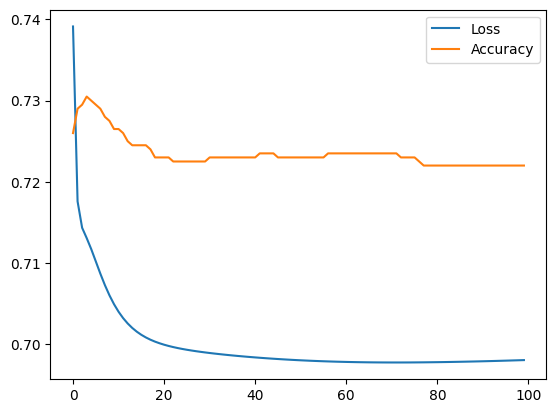

In [379]:
BATCH_SIZE = 128
EPOCHS = 100
HIDDEN_UNITS = 300

optimize_args = {'mode': 'SGD', 'lr': 0.005}

net = FeedForwardNetwork([Linear(diabet_train_data_encoded[diabet_numeric_attr + diabet_ordinal_discrete_attr].shape[1], HIDDEN_UNITS),
                            ReLU(),
                            Linear(HIDDEN_UNITS, 3)])
cost_function = CrossEntropy()
losses = []
accuracies = []
for epoch in range(EPOCHS):
    for b_no, i in enumerate(range(0, len(diabet_train_data_encoded), BATCH_SIZE)):
        x = diabet_train_data_encoded[diabet_numeric_attr + diabet_ordinal_discrete_attr].values[i:i + BATCH_SIZE]
        t = diabet_train_data_encoded['Diabetes'].values[i:i + BATCH_SIZE]
        y = net.forward(x)
        dy = cost_function.backward(y, t)
        net.backward(dy)
        net.update(**optimize_args)
    y = net.forward(diabet_test_data_encoded[diabet_numeric_attr + diabet_ordinal_discrete_attr].values, train=False)
    loss = cost_function.forward(y, diabet_test_data_encoded['Diabetes'].values)
    acc = accuracy(y, diabet_test_data_encoded['Diabetes'].values)
    losses.append(loss)
    accuracies.append(acc)
    print(f'Epoch {epoch + 1}/{EPOCHS} Loss: {loss:.4f})')
f1 = f1_score(diabet_test_data_encoded['Diabetes'], np.argmax(y, axis=1), average='weighted')
precision = precision_score(diabet_test_data_encoded['Diabetes'], np.argmax(y, axis=1), average='weighted')
recall = recall_score(diabet_test_data_encoded['Diabetes'], np.argmax(y, axis=1), average='weighted')
acc = accuracy_score(diabet_test_data_encoded['Diabetes'], np.argmax(y, axis=1))
cm = confusion_matrix(diabet_test_data_encoded['Diabetes'], np.argmax(y, axis=1))
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', acc)
print('Confusion matrix:')
print(cm)
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.legend()
plt.show()



Epoch 1/100 Loss: 0.0157 Accuracy: 1.0000
Epoch 2/100 Loss: 0.0088 Accuracy: 1.0000
Epoch 3/100 Loss: 0.0061 Accuracy: 1.0000
Epoch 4/100 Loss: 0.0047 Accuracy: 1.0000
Epoch 5/100 Loss: 0.0039 Accuracy: 1.0000
Epoch 6/100 Loss: 0.0033 Accuracy: 1.0000
Epoch 7/100 Loss: 0.0029 Accuracy: 1.0000
Epoch 8/100 Loss: 0.0025 Accuracy: 1.0000
Epoch 9/100 Loss: 0.0023 Accuracy: 1.0000
Epoch 10/100 Loss: 0.0021 Accuracy: 1.0000
Epoch 11/100 Loss: 0.0019 Accuracy: 1.0000
Epoch 12/100 Loss: 0.0018 Accuracy: 1.0000
Epoch 13/100 Loss: 0.0016 Accuracy: 1.0000
Epoch 14/100 Loss: 0.0015 Accuracy: 1.0000
Epoch 15/100 Loss: 0.0014 Accuracy: 1.0000
Epoch 16/100 Loss: 0.0013 Accuracy: 1.0000
Epoch 17/100 Loss: 0.0013 Accuracy: 1.0000
Epoch 18/100 Loss: 0.0012 Accuracy: 1.0000
Epoch 19/100 Loss: 0.0011 Accuracy: 1.0000
Epoch 20/100 Loss: 0.0011 Accuracy: 1.0000
Epoch 21/100 Loss: 0.0010 Accuracy: 1.0000
Epoch 22/100 Loss: 0.0010 Accuracy: 1.0000
Epoch 23/100 Loss: 0.0010 Accuracy: 1.0000
Epoch 24/100 Loss: 0

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


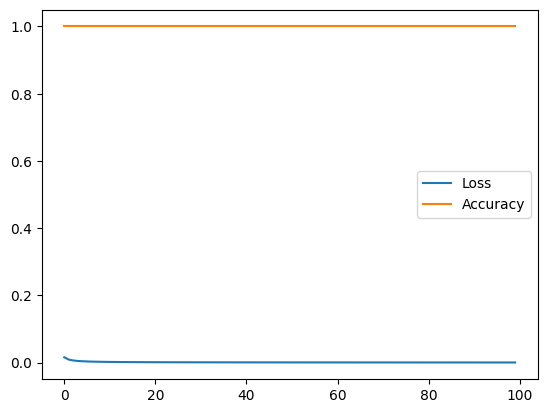

In [380]:
BATCH_SIZE = 128
EPOCHS = 100
HIDDEN_UNITS = 300

optimize_args = {'mode': 'SGD', 'lr': 0.005}

net = FeedForwardNetwork([Linear(credit_risk_train_data_encoded[credit_risk_numeric_attr + credit_risk_discrete_ordinal_attr].shape[1], HIDDEN_UNITS),
                            ReLU(),
                            Linear(HIDDEN_UNITS, 3)])
cost_function = CrossEntropy()

credit_risk_train_data_encoded['loan_approval_status'] = credit_risk_train_data_encoded['loan_approval_status'].apply(lambda x: 1 if x == 'Approved' else 0)
credit_risk_test_data_encoded['loan_approval_status'] = credit_risk_test_data_encoded['loan_approval_status'].apply(lambda x: 1 if x == 'Approved' else 0)
losses = []
accuracies = []
for epoch in range(EPOCHS):
    for b_no, i in enumerate(range(0, len(credit_risk_train_data_encoded), BATCH_SIZE)):
        x = credit_risk_train_data_encoded[credit_risk_numeric_attr + credit_risk_discrete_ordinal_attr].values[i:i + BATCH_SIZE]
        t = credit_risk_train_data_encoded['loan_approval_status'].values[i:i + BATCH_SIZE]
        y = net.forward(x)
        dy = cost_function.backward(y, t)
        net.backward(dy)
        net.update(**optimize_args)
    
    y = net.forward(credit_risk_test_data_encoded[credit_risk_numeric_attr + credit_risk_discrete_ordinal_attr].values, train=False)
    loss = cost_function.forward(y, credit_risk_test_data_encoded['loan_approval_status'].values)
    acc = accuracy(y, credit_risk_test_data_encoded['loan_approval_status'].values)
    losses.append(loss)
    accuracies.append(acc)
    print(f'Epoch {epoch + 1}/{EPOCHS} Loss: {loss:.4f} Accuracy: {acc:.4f}')
f1 = f1_score(credit_risk_test_data_encoded['loan_approval_status'], np.argmax(y, axis=1), average='weighted')
precision = precision_score(credit_risk_test_data_encoded['loan_approval_status'], np.argmax(y, axis=1), average='weighted')
recall = recall_score(credit_risk_test_data_encoded['loan_approval_status'], np.argmax(y, axis=1), average='weighted')
acc = accuracy_score(credit_risk_test_data_encoded['loan_approval_status'], np.argmax(y, axis=1))
cm = confusion_matrix(credit_risk_test_data_encoded['loan_approval_status'], np.argmax(y, axis=1))
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', acc)
print('Confusion matrix:')
print(cm)
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.legend()
plt.show()


In [374]:
def solve_dataset_mlp(train, test, numeric_attr, ordinal_discrete_attr, target_attr):
    X_train = train[numeric_attr + ordinal_discrete_attr]
    y_train = train[target_attr]
    X_test = test[numeric_attr + ordinal_discrete_attr]
    y_test = test[target_attr]
    mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=300, solver='adam', learning_rate_init=0.005, learning_rate='constant', random_state=0,
                        activation = 'relu', alpha=0.0001, batch_size=128, validation_fraction=0.1, n_iter_no_change=10)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return f1, precision, recall, accuracy, cm


In [375]:
f1, precision, recall, accuracy, cm = solve_dataset_mlp(diabet_train_data_encoded, diabet_test_data_encoded, diabet_numeric_attr, diabet_ordinal_discrete_attr, 'Diabetes')
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('Confusion matrix:')
print(cm)

F1 score: 0.6247028894817761
Precision: 0.6705599432781528
Recall: 0.7255
Accuracy: 0.7255
Confusion matrix:
[[1432    1   13]
 [  53    0    1]
 [ 481    0   19]]


In [278]:
f1, precision, recall, accuracy, cm = solve_dataset_mlp(credit_risk_train_data_encoded, credit_risk_test_data_encoded, credit_risk_numeric_attr, credit_risk_discrete_ordinal_attr, 'loan_approval_status')
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('Confusion matrix:')
print(cm)

F1 score: 0.8740110199797566
Precision: 0.8730432409655478
Recall: 0.878
Accuracy: 0.878
Confusion matrix:
[[1477   87]
 [ 157  279]]


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
